In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iea-monthly-electricity-statistics/data.csv
/kaggle/input/temperature-blacksea-nc/temperature_blacksea-analysis_daily-analysis_t_343475.nc
/kaggle/input/noway-meteorological-data/NorwayMeteoDataCompleted.csv
/kaggle/input/30-years-of-european-solar-generation/EMHIRESPV_TSh_CF_Country_19862015.csv
/kaggle/input/30-years-of-european-solar-generation/emhirespv_gonzalezaparicioetal2017_newtemplate_corrected_last.pdf
/kaggle/input/30-years-of-european-solar-generation/EMHIRES_PVGIS_TSh_CF_n2_19862015.csv
/kaggle/input/climate-insights-dataset/climate_change_data.csv
/kaggle/input/climate-insights-dataset/Readme.md


# Import the libreries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import math
import os

# Import the Dataset iea-monthly-electricity-statistics

Daraset Reference: [Monthly Electricity Production in GWh [2010-2022]](https://www.kaggle.com/datasets/ccanb23/iea-monthly-electricity-statistics)

# Energy Production Data

## Data Source
The data was collected from the [International Energy Agency (IEA)](https://www.iea.org/) website, specifically using their [Monthly Electricity Statistics tool](https://www.iea.org/data-and-statistics/data-tools/monthly-electricity-statistics).

For details on the data collection process, you can refer to the [GitHub repository](https://github.com/ccan23/iea_electricity_generation_data_scraper).

## Overview
The dataset provides information on energy production in various countries on a monthly basis from 2010 to 2022. Energy production is measured in gigawatt-hours (GWh) and covers a range of energy products including hydro, wind, solar, geothermal, nuclear, fossil fuels, and others.

### Countries
- Argentina
- Australia
- Austria
- Belgium
- Brazil
- Bulgaria
- Canada
- Chile
- Colombia
- Costa Rica
- Croatia
- Cyprus
- Czech Republic
- Denmark
- Estonia
- Finland
- France
- Germany
- Greece
- Hungary
- IEA Total
- Iceland
- India
- Ireland
- Italy
- Japan
- Korea
- Latvia
- Lithuania
- Luxembourg
- Malta
- Mexico
- Netherlands
- New Zealand
- North Macedonia
- Norway
- OECD Americas
- OECD Asia Oceania
- OECD Europe
- OECD Total
- People's Republic of China
- Poland
- Portugal
- Republic of Turkiye
- Romania
- Serbia
- Slovak Republic
- Slovenia
- Spain
- Sweden
- Switzerland
- United Kingdom
- United States

### Products
- Hydro
- Wind
- Solar
- Geothermal
- Other renewables
- Nuclear
- Total combustible fuels
- Coal
- Oil
- Natural gas
- Combustible renewables
- Other combustible non-renewables
- Not specified
- Net electricity production
- Total imports
- Total exports
- Electricity supplied
- Used for pumped storage
- Distribution losses
- Final consumption
- Electricity trade
- Renewables
- Non-renewables
- Others
- Other renewables aggregated
- Low carbon
- Fossil fuels

## Dataset Columns
- **COUNTRY:** Name of the country
- **CODE_TIME:** Code representing the month and year (e.g., JAN2010 for January 2010)
- **TIME:** Month and year in a human-readable format (e.g., January 2010)
- **YEAR:** Year of the data point
- **MONTH:** Month of the data point as a number (1-12)
- **MONTH_NAME:** Month of the data point as a string (e.g., January)
- **PRODUCT:** Type of energy product (e.g., Hydro, Wind, Solar)
- **VALUE:** Amount of electricity generated in gigawatt-hours (GWh)
- **DISPLAY_ORDER:** Order in which products should be displayed
- **yearToDate:** Amount of electricity generated for the current year up to the current month in GWh
- **previousYearToDate:** Amount of electricity generated for the previous year up to the current month in GWh
- **share:** Share of the product in the total electricity generation for the country in decimal format


In [47]:
df3 = pd.read_csv('/kaggle/input/iea-monthly-electricity-statistics/data.csv')
print(df3)

              COUNTRY CODE_TIME           TIME  YEAR  MONTH MONTH_NAME  \
0           Australia   JAN2010   January 2010  2010      1    January   
1           Australia   JAN2010   January 2010  2010      1    January   
2           Australia   JAN2010   January 2010  2010      1    January   
3           Australia   JAN2010   January 2010  2010      1    January   
4           Australia   JAN2010   January 2010  2010      1    January   
...               ...       ...            ...   ...    ...        ...   
181910  United States   DEC2022  December 2022  2022     12   December   
181911  United States   DEC2022  December 2022  2022     12   December   
181912  United States   DEC2022  December 2022  2022     12   December   
181913  United States   DEC2022  December 2022  2022     12   December   
181914  United States   DEC2022  December 2022  2022     12   December   

                            PRODUCT          VALUE  DISPLAY_ORDER  \
0                             Hydro     99

# Import the Dataset EMHIRES

In [48]:
df4 = pd.read_csv('/kaggle/input/30-years-of-european-solar-generation/EMHIRESPV_TSh_CF_Country_19862015.csv')
print(df4)

         AT   BE   BG   CH  CY   CZ   DE   DK   EE   ES  ...   LV   NL   NO  \
0       0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   
262963  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
262964  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
262965  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
262966  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
262967  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         PL   PT   RO   SI   SK   SE   UK  
0      

# I show the main information of the EMHIRES dataset

#### We have extensively discussed this dataset and its super properties during the past meetings

In [49]:
# Displays the first 20 rows of the dataset
print("------------------------------------------------------First 20 rows of the dataset------------------------------------------")
print(df4.head())

# General information about the dataset
print("------------------------------------------------General information about the dataset---------------------------------------")
print(df4.info())

# Descriptive statistics
print("------------------------------------------------Descriptive statistics------------------------------------------------------")
print(df4.describe())


------------------------------------------------------First 20 rows of the dataset------------------------------------------
    AT   BE   BG   CH  CY   CZ   DE   DK   EE   ES  ...   LV   NL   NO   PL  \
0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    PT   RO   SI   SK   SE   UK  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 29 columns]
------------------------------------------------General information about the dataset---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex

# I add the hour and the year in the EMHIRES dataset
### We know from the documentation that each row of the dataset corresponds to an hour of the day starting from 1986-01-01 00:00:00 so I add the columns Date and Year.

Reference: [EMHIRES](https://data.jrc.ec.europa.eu/dataset/jrc-emhires-solar-generation-time-series)

In [50]:
# Convert the string "01/01/1986 00:00" to a datetime object with the specified format
start_date = pd.to_datetime("01/01/1986 00:00", format="%m/%d/%Y %H:%M")

# Create an array of integers from 0 to the length of df4
hours = np.arange(len(df4))

# Add the array of hours to the start date and assign the result to a new column 'Date' in df4
df4['Date'] = start_date + pd.to_timedelta(hours, unit='h')

# Extract the year from the 'Date' column and assign it to a new column 'Year' in df4
df4['Year'] = df4['Date'].dt.year

print(df4)

         AT   BE   BG   CH  CY   CZ   DE   DK   EE   ES  ...   NO   PL   PT  \
0       0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   
262963  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
262964  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
262965  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
262966  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
262967  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         RO   SI   SK   SE   UK                Date

# Information about the dataset Monthly Electricity Production in GWh [2010-2022]

### As you can see, there are many interesting things that can give us a lot of information if we combine them with what we already have from the EMHIRES dataset.

### In particular, we keep an eye on the COUNTRY column, which is essential because we can take the same countries that we have in the EMHIRES dataset, and the VALUE column, which informs us of the energy generated in GWh.


In [51]:
# Displays the first 20 rows of the dataset
print("------------------------------------------------------First 20 rows of the dataset------------------------------------------")
print(df3.head())

# General information about the dataset
print("------------------------------------------------General information about the dataset---------------------------------------")
print(df3.info())

# Descriptive statistics
print("------------------------------------------------Descriptive statistics------------------------------------------------------")
print(df3.describe())


------------------------------------------------------First 20 rows of the dataset------------------------------------------
     COUNTRY CODE_TIME          TIME  YEAR  MONTH MONTH_NAME  \
0  Australia   JAN2010  January 2010  2010      1    January   
1  Australia   JAN2010  January 2010  2010      1    January   
2  Australia   JAN2010  January 2010  2010      1    January   
3  Australia   JAN2010  January 2010  2010      1    January   
4  Australia   JAN2010  January 2010  2010      1    January   

                   PRODUCT      VALUE  DISPLAY_ORDER  yearToDate  \
0                    Hydro    990.728              1   16471.891   
1                     Wind    409.469              2    4940.909   
2                    Solar     49.216              3     908.238   
3               Geothermal      0.083              4       0.996   
4  Total combustible fuels  19289.730              7  214302.969   

   previousYearToDate     share  
0                 NaN  0.047771  
1            

### I look at which countries are contained in the dataset Monthly Electricity Production in GWh [2010-2022].

In [52]:
country = df3['COUNTRY'].unique()

print("Countries: \n")
for stato in country:
    print(stato)

Countries: 

Australia
Austria
Belgium
Canada
Chile
Czech Republic
Denmark
Estonia
Finland
France
Germany
Greece
Hungary
IEA Total
Iceland
Ireland
Italy
Japan
Korea
Latvia
Lithuania
Luxembourg
Mexico
Netherlands
New Zealand
Norway
OECD Americas
OECD Asia Oceania
OECD Europe
OECD Total
Poland
Portugal
Republic of Turkiye
Slovak Republic
Slovenia
Spain
Sweden
Switzerland
United Kingdom
United States
Colombia
Argentina
Brazil
Bulgaria
Croatia
Cyprus
India
Malta
North Macedonia
Romania
Serbia
Costa Rica


### I filter the dataset so that I have the same countries that I have in the EMHIRES dataset

In [53]:
import pandas as pd

# List of European countries
european_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Switzerland', 'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Estonia',
    'Spain', 'Finland', 'France', 'Greece', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania',
    'Luxembourg', 'Latvia', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Slovakia',
    'Sweden', 'United Kingdom'
]

# Filter the dataset keeping only the European countries
df5 = df3[df3['COUNTRY'].isin(european_countries)].copy()
df5.reset_index(drop=True, inplace=True)
df5['TIME'] = pd.to_datetime(df5['TIME'], format='%B %Y').dt.strftime('%Y-%m')

# Directly assign the value of the "TIME" column in the "YYYY-MM" format using .loc
df5.loc[:, 'TIME'] = df5['TIME'].str.slice(0, 7)

# Filter the DataFrame df5 so that the 'PRODUCT' column only contains the value 'Solar'.
df5_solar = df5[df5['PRODUCT'] == 'Solar'].copy()

# Reset the indices.
df5_solar.reset_index(drop=True, inplace=True)

print(df5_solar)

# Get all the unique countries in the 'COUNTRY' column
countries_unique = df5_solar['COUNTRY'].unique()

print("------------------------------------------------------------------------------------------------------")

# Print the countries
print("Countries: ")
i=1
for country in countries_unique:
    print(i, country)
    i=i+1

print("------------------------------------------------------------------------------------------------------")

print(df5_solar.info())


             COUNTRY CODE_TIME     TIME  YEAR  MONTH MONTH_NAME PRODUCT  \
0            Austria   JAN2010  2010-01  2010      1    January   Solar   
1            Belgium   JAN2010  2010-01  2010      1    January   Solar   
2            Denmark   JAN2010  2010-01  2010      1    January   Solar   
3            Finland   JAN2010  2010-01  2010      1    January   Solar   
4             France   JAN2010  2010-01  2010      1    January   Solar   
...              ...       ...      ...   ...    ...        ...     ...   
3835        Slovenia   DEC2022  2022-12  2022     12   December   Solar   
3836           Spain   DEC2022  2022-12  2022     12   December   Solar   
3837          Sweden   DEC2022  2022-12  2022     12   December   Solar   
3838     Switzerland   DEC2022  2022-12  2022     12   December   Solar   
3839  United Kingdom   DEC2022  2022-12  2022     12   December   Solar   

            VALUE  DISPLAY_ORDER    yearToDate  previousYearToDate     share  
0        2.864000   

# Modifying the EMHIRES dataset to make it more readable when comparing it with the Monthly Electricity Production in GWh [2010-2022] datase
Now, from the EMHIRES dataset, I want to obtain a new DataFrame df_melted where the “Countries” column contains the state abbreviations and the “Value” column contains the corresponding values.

In [54]:
# Use the melt method to combine the state columns into a single "Countries" column
df_melted = pd.melt(df4, id_vars=['Date', 'Year'], value_vars=['AT', 'BE','BG','CH','CY','CZ','DE','DK','EE','ES','FI','FR','EL','HR','HU','IE','IT','LT','LU','LV','NL','NO','PL','PT' ,'RO', 'SI', 'SK', 'SE', 'UK'], var_name='COUNTRY', value_name='ValueEmhires')

# Print the resulting DataFrame
print(df_melted)

# Select the first row for AT
first_row_AT = df_melted[(df_melted['COUNTRY'] == 'AT')].head()

# Select the first row for UK
first_row_UK = df_melted[(df_melted['COUNTRY'] == 'UK')].head()

# Print the results
print("AT:")
print(first_row_AT)

print("\nUK:")
print(first_row_UK)


                       Date  Year COUNTRY  ValueEmhires
0       1986-01-01 00:00:00  1986      AT           0.0
1       1986-01-01 01:00:00  1986      AT           0.0
2       1986-01-01 02:00:00  1986      AT           0.0
3       1986-01-01 03:00:00  1986      AT           0.0
4       1986-01-01 04:00:00  1986      AT           0.0
...                     ...   ...     ...           ...
7626067 2015-12-31 19:00:00  2015      UK           0.0
7626068 2015-12-31 20:00:00  2015      UK           0.0
7626069 2015-12-31 21:00:00  2015      UK           0.0
7626070 2015-12-31 22:00:00  2015      UK           0.0
7626071 2015-12-31 23:00:00  2015      UK           0.0

[7626072 rows x 4 columns]
AT:
                 Date  Year COUNTRY  ValueEmhires
0 1986-01-01 00:00:00  1986      AT           0.0
1 1986-01-01 01:00:00  1986      AT           0.0
2 1986-01-01 02:00:00  1986      AT           0.0
3 1986-01-01 03:00:00  1986      AT           0.0
4 1986-01-01 04:00:00  1986      AT           

### The code groups and condenses the Emhires dataset by month. The 'ValueEmhires' value is obtained by taking the average of all the hours within that month.

In [55]:
# Convert 'Date' column to datetime type
df_melted['Date'] = pd.to_datetime(df_melted['Date'])

# Extract the month from the 'Date' column and create a new 'Month' column
df_melted['TIME'] = df_melted['Date'].dt.to_period('M')

# Group by 'Month', 'Year', and 'Countries', calculate the mean of 'Value'
df_monthly_avg = df_melted.groupby(['TIME', 'Year', 'COUNTRY'])['ValueEmhires'].mean().reset_index()

# Print the resulting DataFrame
print(df_monthly_avg)

# Select the first row for AT
first_row_AT = df_monthly_avg[(df_monthly_avg['COUNTRY'] == 'AT')].head()

# Select the first row for UK
first_row_UK = df_monthly_avg[(df_monthly_avg['COUNTRY'] == 'UK')].head()

# Print the results
print("AT:")
print(first_row_AT)

print("\nUK:")
print(first_row_UK)


          TIME  Year COUNTRY  ValueEmhires
0      1986-01  1986      AT      0.066133
1      1986-01  1986      BE      0.039115
2      1986-01  1986      BG      0.064399
3      1986-01  1986      CH      0.061517
4      1986-01  1986      CY      0.000000
...        ...   ...     ...           ...
10435  2015-12  2015      RO      0.092528
10436  2015-12  2015      SE      0.012640
10437  2015-12  2015      SI      0.083604
10438  2015-12  2015      SK      0.050511
10439  2015-12  2015      UK      0.024718

[10440 rows x 4 columns]
AT:
        TIME  Year COUNTRY  ValueEmhires
0    1986-01  1986      AT      0.066133
29   1986-02  1986      AT      0.116891
58   1986-03  1986      AT      0.110419
87   1986-04  1986      AT      0.139985
116  1986-05  1986      AT      0.164257

UK:
        TIME  Year COUNTRY  ValueEmhires
28   1986-01  1986      UK      0.034946
57   1986-02  1986      UK      0.062297
86   1986-03  1986      UK      0.084634
115  1986-04  1986      UK      0.10904

### I filter the EMHIRES dataset to contain only data between 2010 and 2022. This operation is necessary for a perfect match with the other dataset.

In [56]:
import pandas as pd

# # Convert the 'Year' column to numeric format for comparison.
df_monthly_avg['Year'] = pd.to_numeric(df_monthly_avg['Year'])

# Filter the DataFrame for the years between 2010 and 2022.
df_filtered = df_monthly_avg.query('2010 <= Year <= 2022')

# Reset the index of the DataFrame.
df_filtered = df_filtered.reset_index(drop=True)

# Define a dictionary for mapping to use for substitution.
mapping_dict = {
    'AT': 'Austria',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'CH': 'Switzerland',
    'CY': 'Cyprus',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'EL': 'Greece',
    'HR': 'Croatia',
    'HU': 'Hungary',
    'IE': 'Ireland',
    'IT': 'Italy',
    'LT': 'Lithuania',
    'LU': 'Luxemburg',
    'LV': 'Latvia',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'SE': 'Sweden',
    'UK': 'United Kingdom'
}

# Replace the values in the 'COUNTRY' columns and convert initials to uppercase and the rest to lowercase.
df_filtered['COUNTRY'] = df_filtered['COUNTRY'].replace(mapping_dict).str.title()

df_filtered.to_csv('df_filtered.csv', index=False)
# Print
print(df_filtered)


         TIME  Year         COUNTRY  ValueEmhires
0     2010-01  2010         Austria      0.066595
1     2010-01  2010         Belgium      0.039520
2     2010-01  2010        Bulgaria      0.054749
3     2010-01  2010     Switzerland      0.071990
4     2010-01  2010          Cyprus      0.000000
...       ...   ...             ...           ...
2083  2015-12  2015         Romania      0.092528
2084  2015-12  2015          Sweden      0.012640
2085  2015-12  2015        Slovenia      0.083604
2086  2015-12  2015        Slovakia      0.050511
2087  2015-12  2015  United Kingdom      0.024718

[2088 rows x 4 columns]


# After preprocessing the data, now I create a single dataset based on the "TIME" and "COUNTRY" columns.

In [57]:
import pandas as pd

df_filtered['TIME'] = df_filtered['TIME'].astype(str)
df5_solar['TIME'] = df5_solar['TIME'].astype(str)

# Merge the two DataFrames based on the columns TIME and COUNTRY.
merged_df = pd.merge(df_filtered, df5_solar, on=['TIME', 'COUNTRY'])

# Display the resulting new DataFrame.
print(merged_df)
merged_df.to_csv('merged_df.csv', index=False)

print(merged_df.info())



         TIME  Year         COUNTRY  ValueEmhires CODE_TIME  YEAR  MONTH  \
0     2010-01  2010         Austria      0.066595   JAN2010  2010      1   
1     2010-01  2010         Belgium      0.039520   JAN2010  2010      1   
2     2010-01  2010     Switzerland      0.071990   JAN2010  2010      1   
3     2010-01  2010         Germany      0.034329   JAN2010  2010      1   
4     2010-01  2010         Denmark      0.028771   JAN2010  2010      1   
...       ...   ...             ...           ...       ...   ...    ...   
1495  2015-12  2015        Portugal      0.133338   DEC2015  2015     12   
1496  2015-12  2015         Romania      0.092528   DEC2015  2015     12   
1497  2015-12  2015          Sweden      0.012640   DEC2015  2015     12   
1498  2015-12  2015        Slovenia      0.083604   DEC2015  2015     12   
1499  2015-12  2015  United Kingdom      0.024718   DEC2015  2015     12   

     MONTH_NAME PRODUCT    VALUE  DISPLAY_ORDER  yearToDate  \
0       January   Solar 

# Elimination of features that are not useful:

- Remove the columns 'Year', 'CODE_TIME', 'MONTH', and 'MONTH_NAME' as they are already included in 'TIME'.
- Remove the 'PRODUCT' column as it is always 'solar' (obtained from the previous filtering).
- Remove the 'DISPLAY_ORDER' column as the dataset is already numbered.

In [58]:
columns_to_drop = ['Year','YEAR', 'CODE_TIME', 'MONTH', 'MONTH_NAME', 'PRODUCT', 'DISPLAY_ORDER']
merged_df.drop(columns=columns_to_drop, inplace=True)
merged_df = merged_df.rename(columns={'VALUE': 'ValueIEA'})

print(merged_df)
print("-----------------------------------------------------------------")
print(merged_df.info())

         TIME         COUNTRY  ValueEmhires  ValueIEA  yearToDate  \
0     2010-01         Austria      0.066595     2.864      84.421   
1     2010-01         Belgium      0.039520    17.450     560.000   
2     2010-01     Switzerland      0.071990     3.473      94.000   
3     2010-01         Germany      0.034329   423.832   11728.998   
4     2010-01         Denmark      0.028771     0.134       6.000   
...       ...             ...           ...       ...         ...   
1495  2015-12        Portugal      0.133338    36.652     796.155   
1496  2015-12         Romania      0.092528    77.579    1982.000   
1497  2015-12          Sweden      0.012640     1.691      97.000   
1498  2015-12        Slovenia      0.083604     9.794     274.233   
1499  2015-12  United Kingdom      0.024718   133.125    7532.865   

      previousYearToDate     share  
0                    NaN  0.000485  
1                    NaN  0.002092  
2                    NaN  0.000627  
3                    Na

### I associate an ID with each country because it is easier to work with numerical data rather than string data.

In [59]:
# Create the dictionary by automatically mapping countries to IDs
dictionary = {country: idx + 1 for idx, country in enumerate(merged_df['COUNTRY'].unique())}
print(dictionary)

# Replace country names with IDs in the dataframe
merged_df['ID'] = merged_df['COUNTRY'].map(dictionary)

# Save the association between countries and IDs in a new dataframe
association_id_country = pd.DataFrame(list(dictionary.items()), columns=['COUNTRY', 'ID'])
association_id_country.to_csv('association_id_country.csv', index=False)

# Drop the 'COUNTRY' column as it is no longer needed
merged_df.drop(columns='COUNTRY', inplace=True)
merged_df.to_csv('a.csv', index=False)
print(merged_df.head)
print(merged_df.info())

print("----------------------------------------------------------------------------")

# Replace 'ID' with the actual column name you want to analyze
value_counts = merged_df['ID'].value_counts()

# Print the count of each value in the 'ID' column
print("Count of each value in the 'ID' column:")
print(value_counts)


{'Austria': 1, 'Belgium': 2, 'Switzerland': 3, 'Germany': 4, 'Denmark': 5, 'Greece': 6, 'Spain': 7, 'Finland': 8, 'France': 9, 'Hungary': 10, 'Ireland': 11, 'Italy': 12, 'Latvia': 13, 'Netherlands': 14, 'Poland': 15, 'Portugal': 16, 'Sweden': 17, 'Slovenia': 18, 'United Kingdom': 19, 'Lithuania': 20, 'Norway': 21, 'Bulgaria': 22, 'Cyprus': 23, 'Croatia': 24, 'Romania': 25}
<bound method NDFrame.head of          TIME  ValueEmhires  ValueIEA  yearToDate  previousYearToDate  \
0     2010-01      0.066595     2.864      84.421                 NaN   
1     2010-01      0.039520    17.450     560.000                 NaN   
2     2010-01      0.071990     3.473      94.000                 NaN   
3     2010-01      0.034329   423.832   11728.998                 NaN   
4     2010-01      0.028771     0.134       6.000                 NaN   
...       ...           ...       ...         ...                 ...   
1495  2015-12      0.133338    36.652     796.155             627.314   
1496  2015

### Add the 'Year' and 'Month' columns because it is easier to handle dates if they are in separate columns

In [60]:
merged_df['Year'] = merged_df['TIME'].str.split('-').str[0].astype(int)
merged_df['Month'] = merged_df['TIME'].str.split('-').str[1].astype(int)
# merged_df.drop(columns='TIME', inplace=True)

# Linear correlation matrix of merged_df

It's indeed interesting to observe that the values of 'ValueEmhires' and 'ValueIEA' are not highly correlated. This observation is not necessarily an error in the dataset; it may reflect the fact that these two variables measure different aspects. It is plausible that, for certain years, even if the energy production is high, the capacity factor might not necessarily be high as well. The capacity factor is influenced by various factors beyond just energy production.

The capacity factor is a measure of how efficiently a power plant operates and is often affected by factors such as maintenance, downtime, and overall plant efficiency. While high energy production is essential, the capacity factor provides additional insights into the operational efficiency of the power generation process.

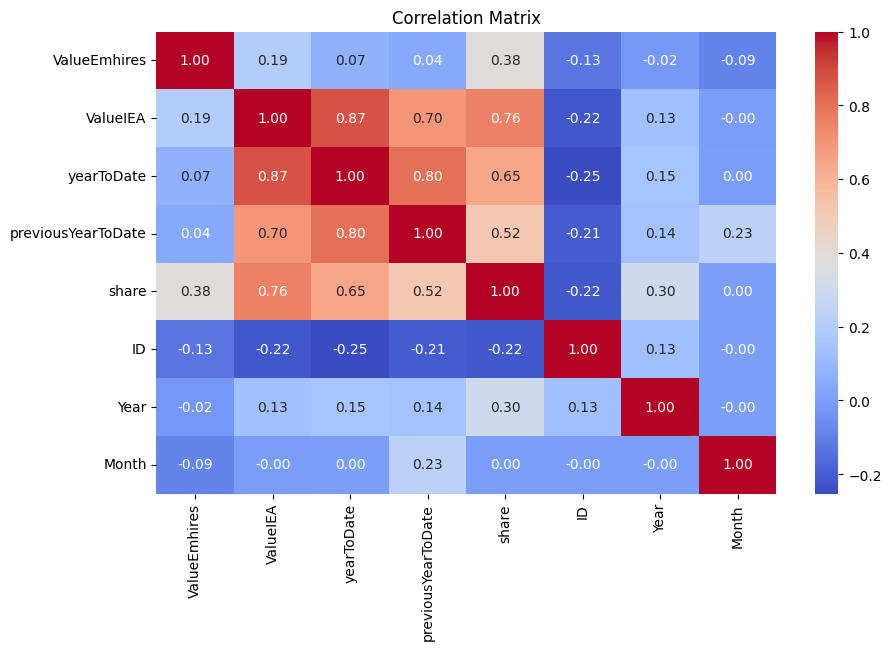

In [61]:
import seaborn as sns

# Select only numerical columns.
numeric_columns = merged_df.select_dtypes(include='number')

# Calculate the correlation matrix only for numerical columns.
numeric_correlation_matrix = numeric_columns.corr()

# Create a plot of the correlation matrix.
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Significant Graphs of 'ValueIEA' and 'ValueEmhires'
## In the following section, you will find graphs representing significant values of the two datasets over time.
## An interesting observation is that electricity production is significantly higher during the summer and spring months. This makes sense as one would expect better performance during those months when temperatures are higher, and there is more sunlight for an extended duration during the day.

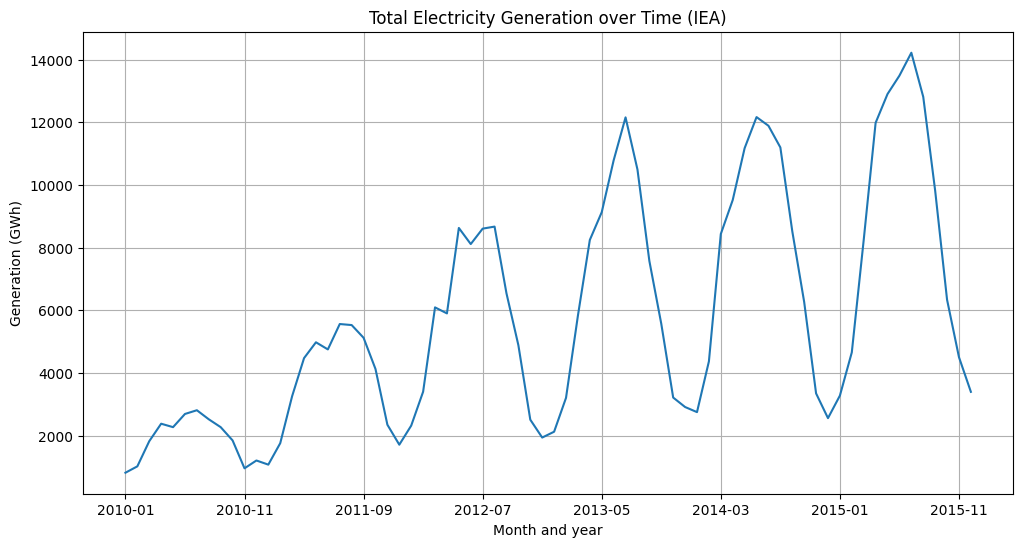

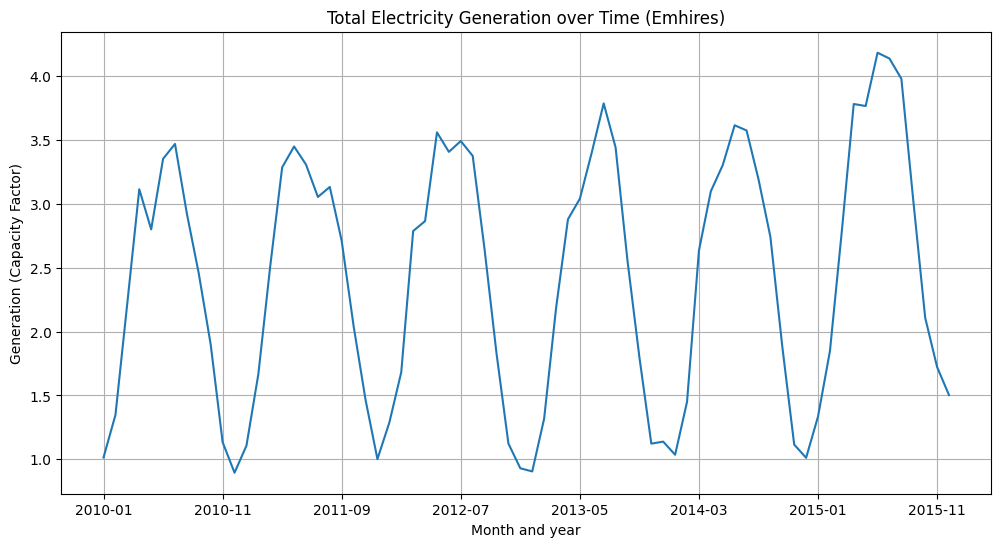

In [62]:
# Analysis of total monthly electricity generation
monthly_generation = merged_df.groupby('TIME')['ValueIEA'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation.plot(kind='line')

plt.title('Total Electricity Generation over Time (IEA)')
plt.xlabel('Month and year')
plt.ylabel('Generation (GWh)')
plt.grid(True)
plt.show()


# Analysis of total monthly electricity generation
monthly_generation2 = merged_df.groupby('TIME')['ValueEmhires'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('Total Electricity Generation over Time (Emhires)')
plt.xlabel('Month and year')
plt.ylabel('Generation (Capacity Factor)')
plt.grid(True)
plt.show()


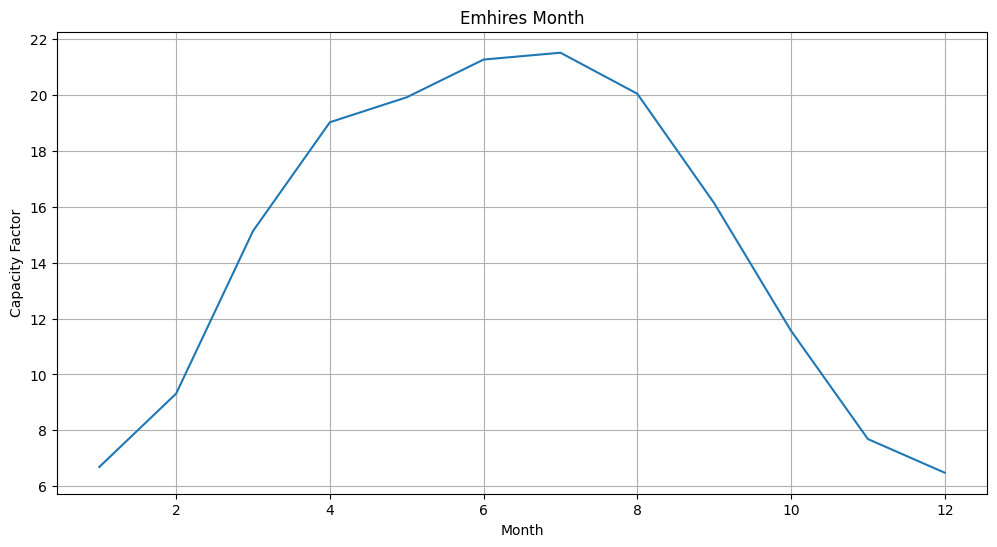

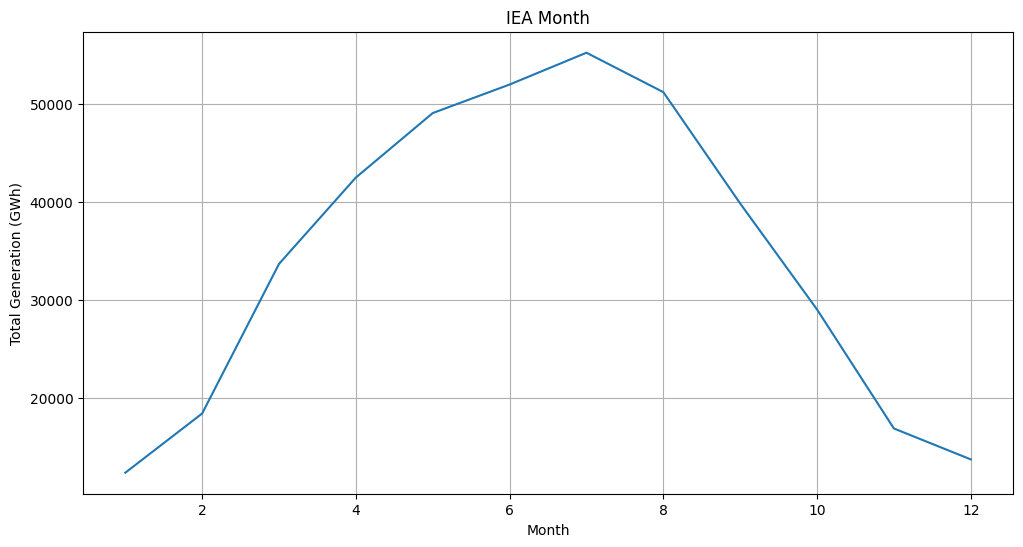

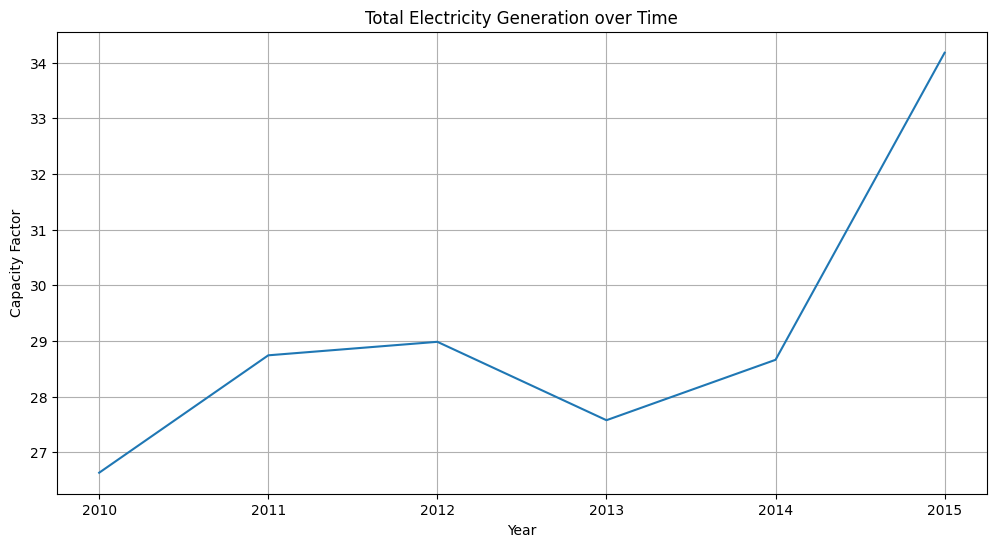

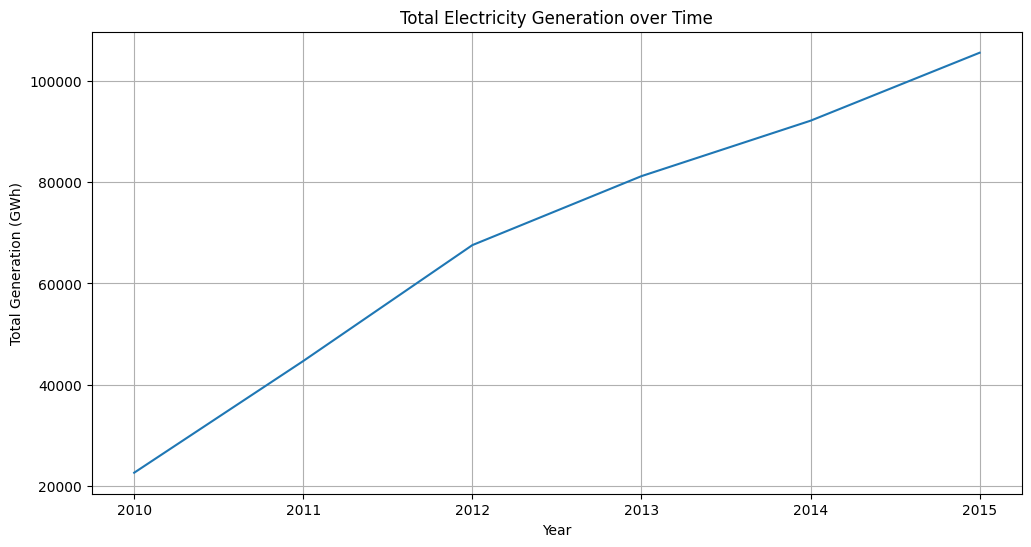

In [63]:
# Analysis of total monthly electricity generation
monthly_generation = merged_df.groupby('Month')['ValueEmhires'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation.plot(kind='line')

plt.title('Emhires Month')
plt.xlabel('Month')
plt.ylabel('Capacity Factor')
plt.grid(True)
plt.show()

# Analysis of total monthly electricity generation
monthly_generation = merged_df.groupby('Month')['ValueIEA'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation.plot(kind='line')

plt.title('IEA Month')
plt.xlabel('Month')
plt.ylabel('Total Generation (GWh)')
plt.grid(True)
plt.show()


# Analysis of total monthly electricity generation
monthly_generation = merged_df.groupby('Year')['ValueEmhires'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation.plot(kind='line')

plt.title('Total Electricity Generation over Time')
plt.xlabel('Year')
plt.ylabel('Capacity Factor')
plt.grid(True)
plt.show()

# Analysis of total monthly electricity generation
monthly_generation = merged_df.groupby('Year')['ValueIEA'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation.plot(kind='line')

plt.title('Total Electricity Generation over Time')
plt.xlabel('Year')
plt.ylabel('Total Generation (GWh)')
plt.grid(True)
plt.show()

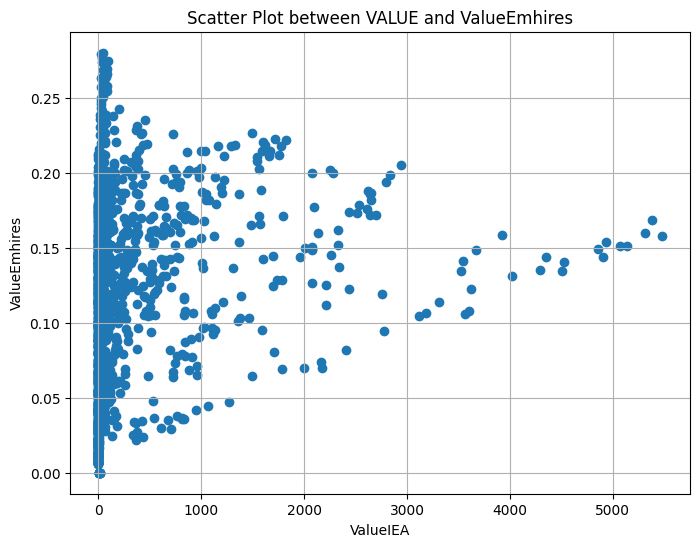

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['ValueIEA'], merged_df['ValueEmhires'])
plt.title('Scatter Plot between VALUE and ValueEmhires')
plt.xlabel('ValueIEA')
plt.ylabel('ValueEmhires')
plt.grid(True)
plt.show()


I put average values where data is missing

# Norway Meteorological Dataset
The weather records come from 55 meteorological stations across Norway, dated from 01-01-2010 to 31-12-2021.
The columns include:
- **ID**
- **Station coordinates**
- **Maximum air temperature for the specific day**
- **Average air temperature for the specific day**
- **Maximum wind speed for the specific day**
- **Average wind speed for the specific day**
- **Average relative humidity for the specific day**
- **Maximum relative humidity for the specific day**

Some values may be NaN as most stations record only some of the mentioned metrics."
Link: [Norway Dataset](https://www.kaggle.com/datasets/annbengardt/noway-meteorological-data/data)

## Information about dataset

In [65]:
dfNorway = pd.read_csv('/kaggle/input/noway-meteorological-data/NorwayMeteoDataCompleted.csv')
print(dfNorway)
print(dfNorway.info())

        Unnamed: 0   sourceId   latitude  longtitude  \
0                0      SN100  61.134900   12.503900   
1                1     SN1135  58.990000   11.540800   
2                2  SN1151800  50.100278   14.255556   
3                3    SN15262  61.674000    8.368500   
4                4  SN1531000  45.473056   28.032222   
...            ...        ...        ...         ...   
237624      237624    SN50110  60.337200    6.217500   
237625      237625    SN98978  70.335700   28.964800   
237626      237626   SN299300  60.301111   19.131389   
237627      237627    SN50110  60.337200    6.217500   
237628      237628    SN98978  70.335700   28.964800   

        max(air_temperature P1D)  max(relative_humidity P1D)  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                            NaN                         NaN   
3                            NaN                         NaN   
4      

### Remove the columns **'Unnamed: 0', 'sourceId', 'latitude', 'longitude'** as they are not useful.

In [66]:
to_drop = ['Unnamed: 0','sourceId','latitude','longtitude']
dfNorway.drop(to_drop , axis=1, inplace=True)
print(dfNorway)
print("\n\n\n")
print(dfNorway.info())

        max(air_temperature P1D)  max(relative_humidity P1D)  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                            NaN                         NaN   
3                            NaN                         NaN   
4                            NaN                         NaN   
...                          ...                         ...   
237624                       NaN                         NaN   
237625                    -11.25                        89.0   
237626                       NaN                         NaN   
237627                       NaN                         NaN   
237628                     -7.00                        94.0   

        max(wind_speed P1D)  mean(air_temperature P1D)  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

### Fill the columns with null values by replacing them with the mean of the respective column values.

In [67]:
# Calculate the mean of each column in the dataframe dfNorway
average_col = dfNorway.mean()

In [68]:
# Fill NaN values in the dataframe dfNorway with the respective column means
dfNorway = dfNorway.fillna(average_col)

### Group the dataset by month to simplify further analysis and comparison with other datasets.

In [69]:
# Define the columns and their respective operations
operation = {
    'max(air_temperature P1D)': 'max',  # You can replace 'mean' with 'sum', 'max', or any other desired function
    'max(relative_humidity P1D)': 'max',
    'max(wind_speed P1D)': 'max',
    'mean(air_temperature P1D)': 'mean',
    'mean(relative_humidity P1D)': 'mean',
    'mean(wind_speed P1D)': 'mean',
    'sum(precipitation_amount P1D)': 'sum'
}

# Group by month and year and apply the specified operations
dfNor_Complete = dfNorway 
dfNorway = dfNorway.groupby(['month', 'year']).agg(operation).reset_index()
print("\n\n\n")
# Filter data for years starting from 2012
dfNorway = dfNorway[dfNorway['year'] >= 2012]
dfNorway.reset_index(drop=True, inplace=True)

print(dfNorway)





     month  year  max(air_temperature P1D)  max(relative_humidity P1D)  \
0        1  2012                  7.296911                        99.0   
1        1  2013                 13.300000                        99.0   
2        1  2014                 14.400000                       100.0   
3        1  2015                 13.800000                       100.0   
4        1  2016                 11.800000                        99.0   
..     ...   ...                       ...                         ...   
115     12  2017                 10.900000                       100.0   
116     12  2018                 10.000000                       100.0   
117     12  2019                 10.000000                       100.0   
118     12  2020                 10.300000                       100.0   
119     12  2021                 10.500000                       100.0   

     max(wind_speed P1D)  mean(air_temperature P1D)  \
0                   23.1                   3.236080 

# IEA Dataset Once Again
### I am using this dataset again to compare it with the Norwegian dataset to see if there is a correlation between weather and energy production.

In [70]:
dfIEA = pd.read_csv('/kaggle/input/iea-monthly-electricity-statistics/data.csv')

df_IEA = dfIEA[dfIEA['COUNTRY'] == "Norway"]
df_IEA = df_IEA[df_IEA['PRODUCT'] == 'Solar']

to_drop = ['COUNTRY','CODE_TIME','TIME','MONTH_NAME', 'PRODUCT','DISPLAY_ORDER']
df_IEA.drop(to_drop , axis=1, inplace=True)

df_IEA.rename(columns={'YEAR': 'year'}, inplace=True)
df_IEA.rename(columns={'MONTH': 'month'}, inplace=True)
df_IEA.rename(columns={'VALUE': 'value'}, inplace=True)

df_IEA = df_IEA[df_IEA['year'] <= 2021]

# Reset the indices explicitly so that they start from 0
df_IEA.reset_index(drop=True, inplace=True)
print(df_IEA)
print("\n\n\n")
df_IEA.to_csv('df_IEA.csv', index=False)

     year  month     value  yearToDate  previousYearToDate     share
0    2012      1  0.000000    0.000000                 NaN  0.000000
1    2012      2  0.000000    0.000000                 NaN  0.000000
2    2012      3  0.000000    0.000000                 NaN  0.000000
3    2012      4  0.000000    0.000000                 NaN  0.000000
4    2012      5  0.000000    0.000000                 NaN  0.000000
..    ...    ...       ...         ...                 ...       ...
103  2021      8  2.943831   26.494479           21.667657  0.000282
104  2021      9  2.201243   26.494479           23.868900  0.000195
105  2021     10  1.458655   26.494479           25.327555  0.000118
106  2021     11  0.689546   26.494479           26.017101  0.000048
107  2021     12  0.477378   26.494479           26.494479  0.000030

[108 rows x 6 columns]






# Merge

In [71]:
# Merge the two DataFrames based on the columns year and month.
df_Norway_IEA = pd.merge(df_IEA, dfNorway, on=['year', 'month'])
print(df_Norway_IEA)
print("\n\n\n")
print(df_Norway_IEA.info())

     year  month     value  yearToDate  previousYearToDate     share  \
0    2012      1  0.000000    0.000000                 NaN  0.000000   
1    2012      2  0.000000    0.000000                 NaN  0.000000   
2    2012      3  0.000000    0.000000                 NaN  0.000000   
3    2012      4  0.000000    0.000000                 NaN  0.000000   
4    2012      5  0.000000    0.000000                 NaN  0.000000   
..    ...    ...       ...         ...                 ...       ...   
103  2021      8  2.943831   26.494479           21.667657  0.000282   
104  2021      9  2.201243   26.494479           23.868900  0.000195   
105  2021     10  1.458655   26.494479           25.327555  0.000118   
106  2021     11  0.689546   26.494479           26.017101  0.000048   
107  2021     12  0.477378   26.494479           26.494479  0.000030   

     max(air_temperature P1D)  max(relative_humidity P1D)  \
0                    7.296911                        99.0   
1            

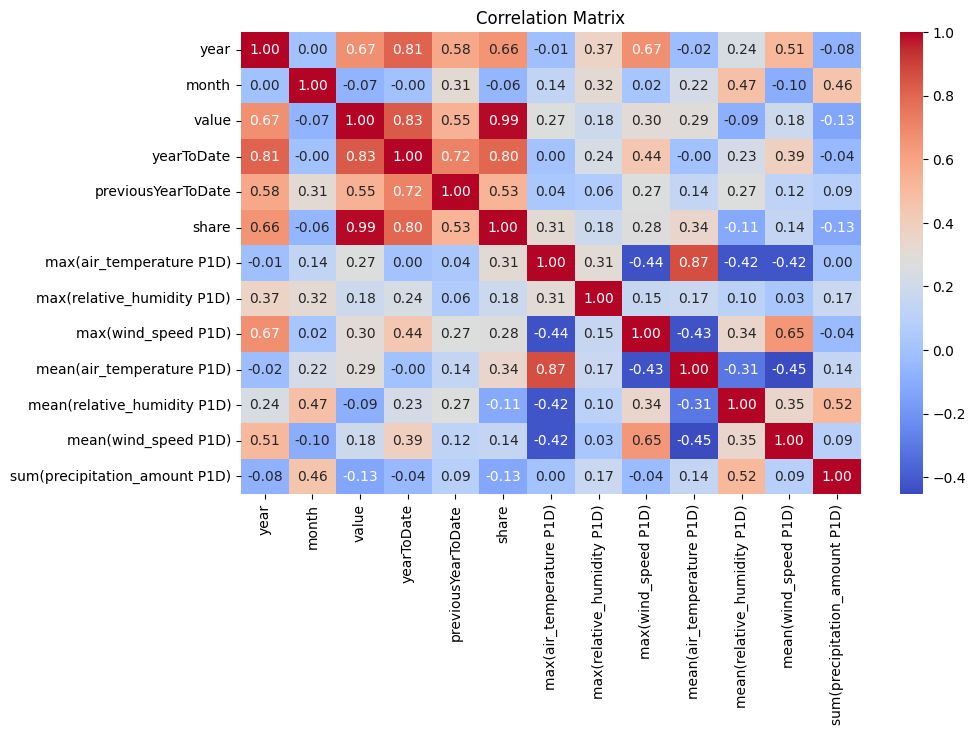

In [72]:
# Select only numerical columns.
numeric_columns = df_Norway_IEA.select_dtypes(include='number')

# Calculate the correlation matrix only for numerical columns.
numeric_correlation_matrix = numeric_columns.corr()

# Create a plot of the correlation matrix.
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Now, I want to graphically represent the main features I have identified. From the IEA dataset graphs, previously examined, it is evident that the majority of energy production occurs during the summer months or, more broadly, in months considered "warm" such as May, June, July, and August.

### I expect this trend to be reflected in the Norwegian climate dataset, showing an increase in temperatures during the same months. To test this hypothesis, I plan to create graphs highlighting the relationship between energy production and temperatures in different months of the year in Norway. This visual analysis should allow me to confirm or refute the correlation between energy production and higher temperatures, particularly during the summer months.

### The study reveals that only air temperature, which exhibits a similar trend to the expected graph, is directly correlated with energy production. Conversely, other meteorological aspects do not show a Gaussian curve, indicating that they do not directly influence energy production.

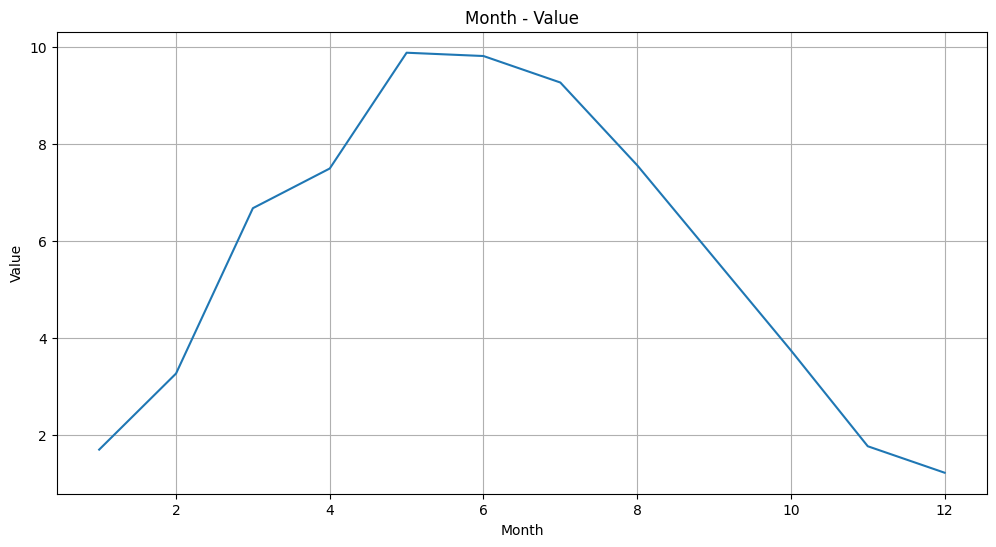

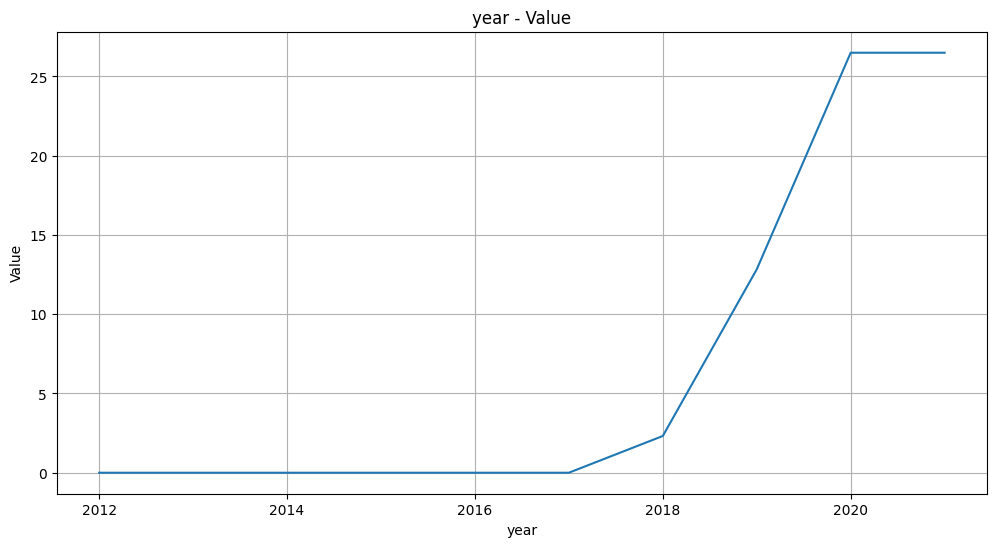

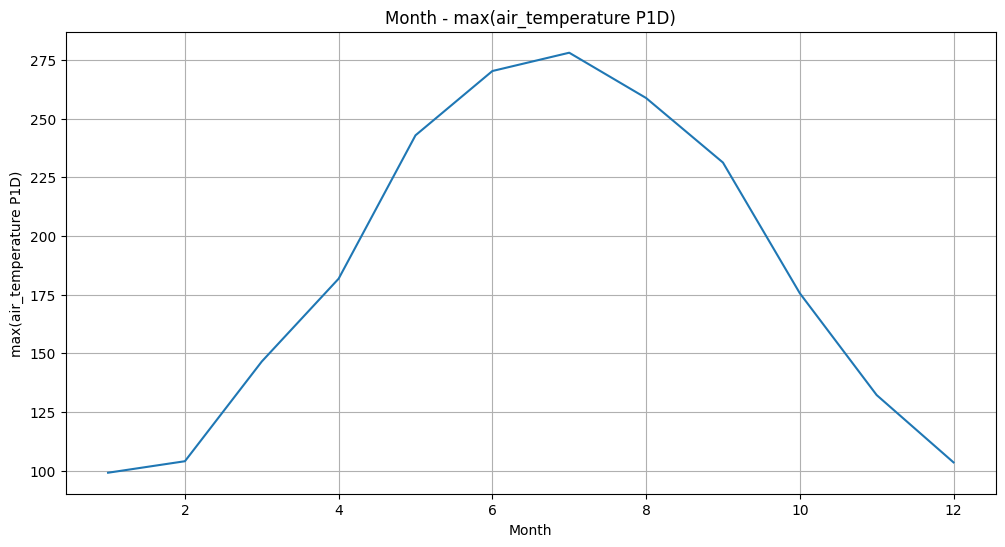

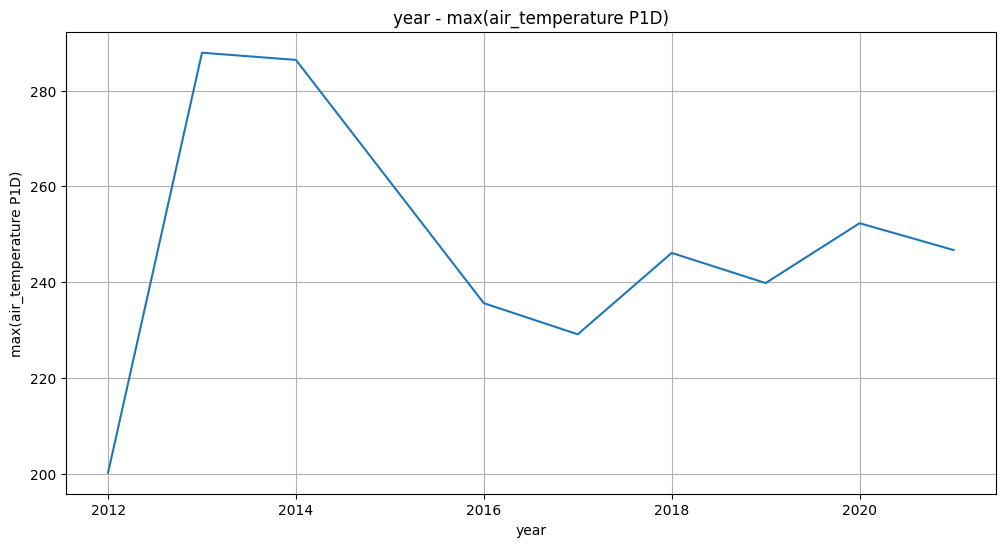

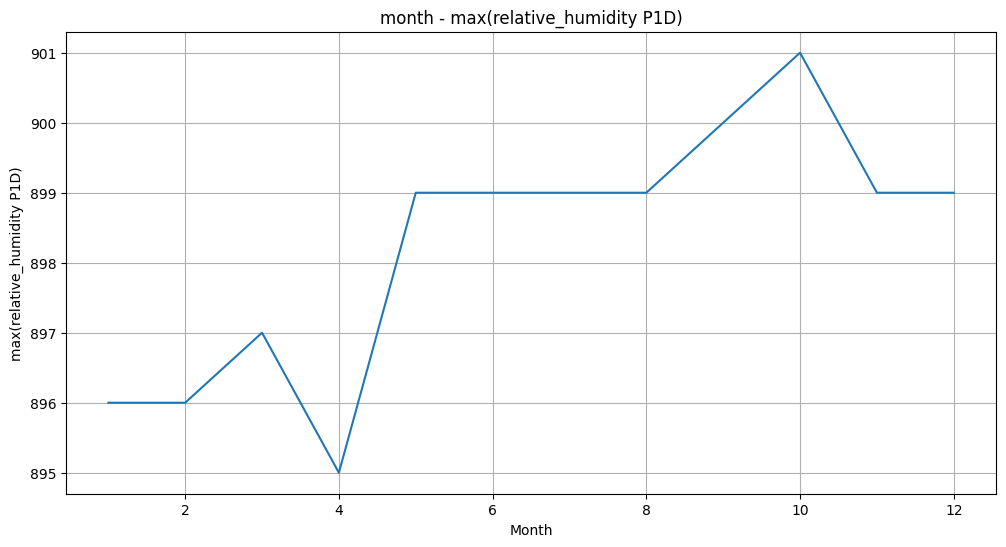

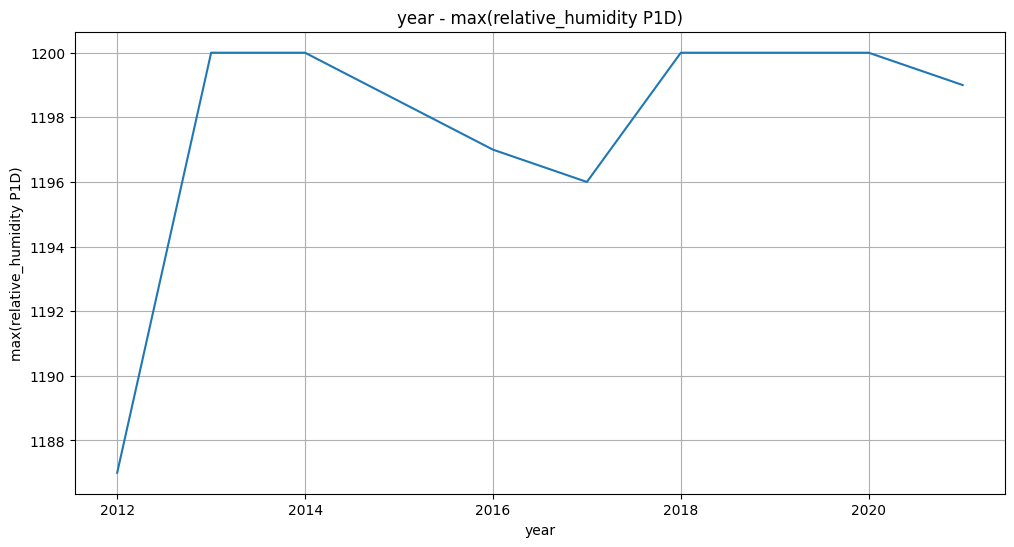

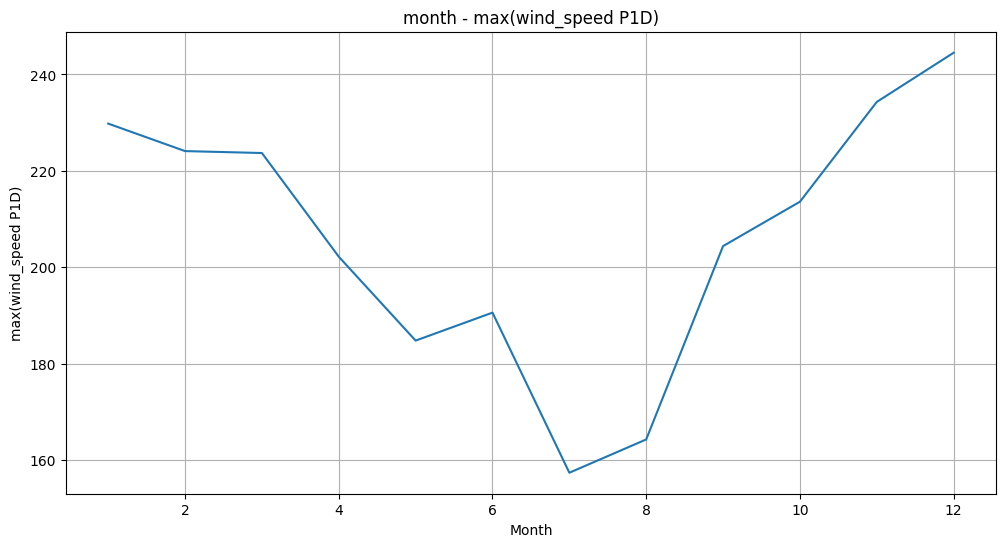

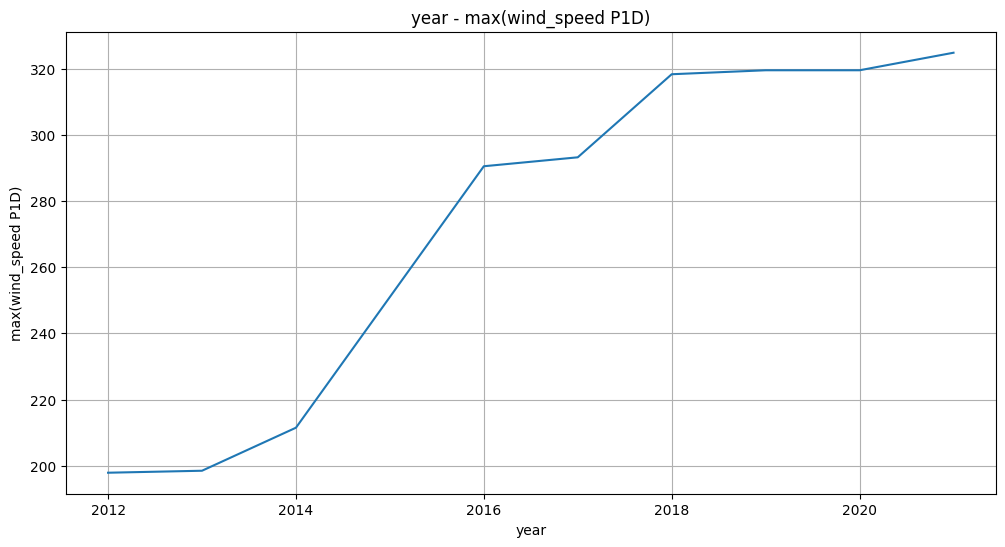

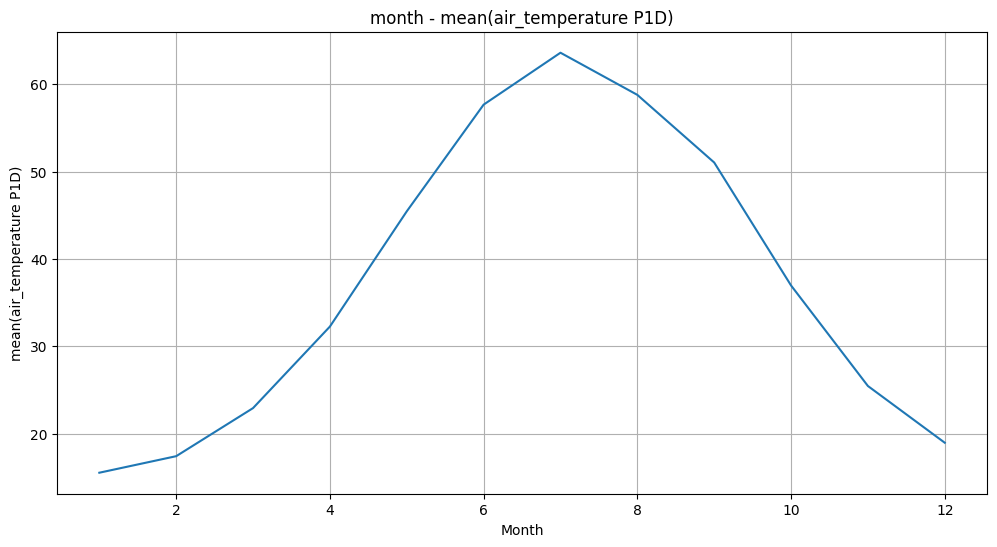

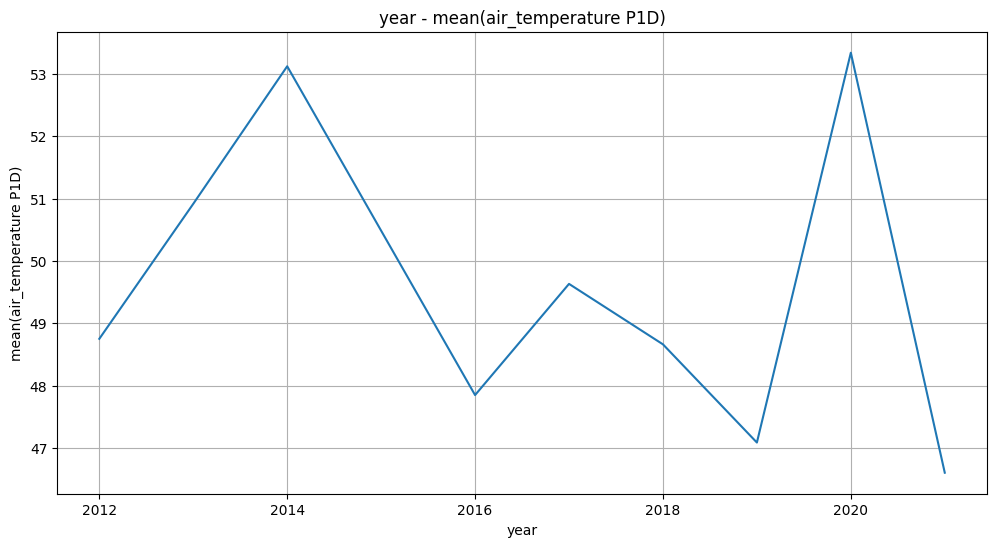

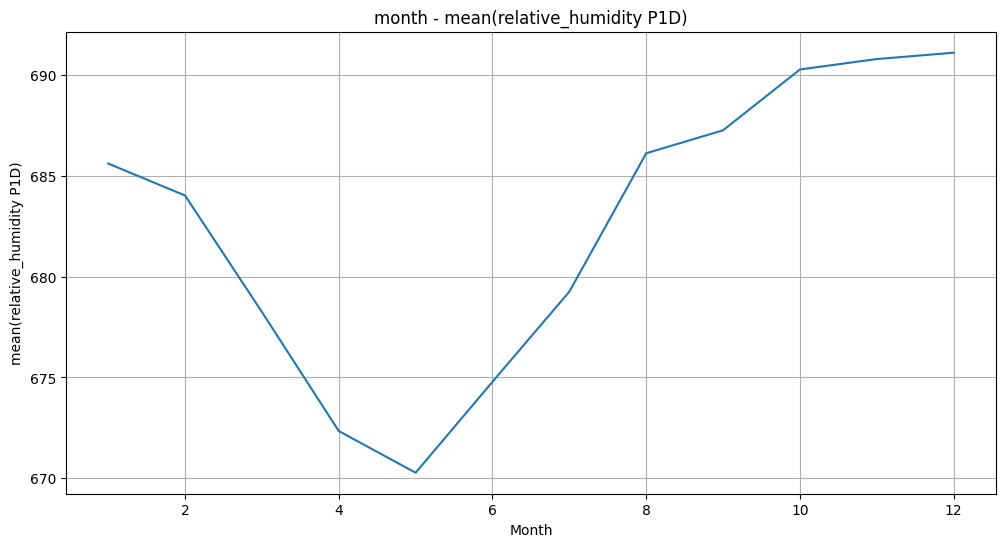

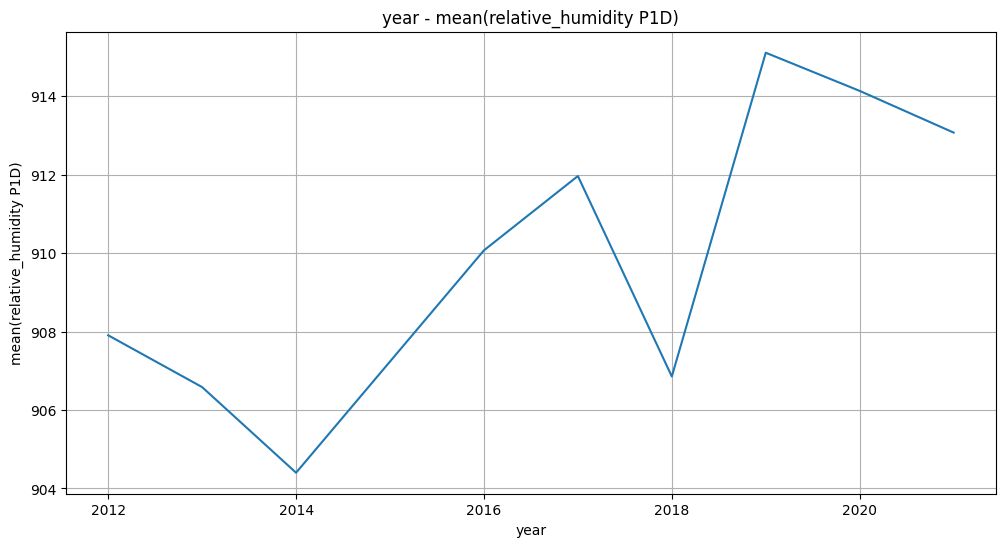

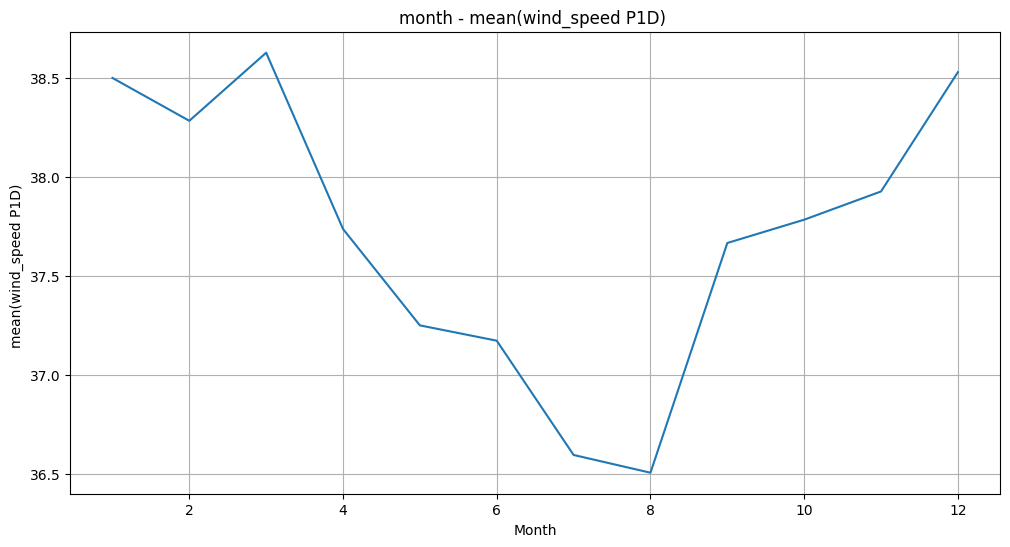

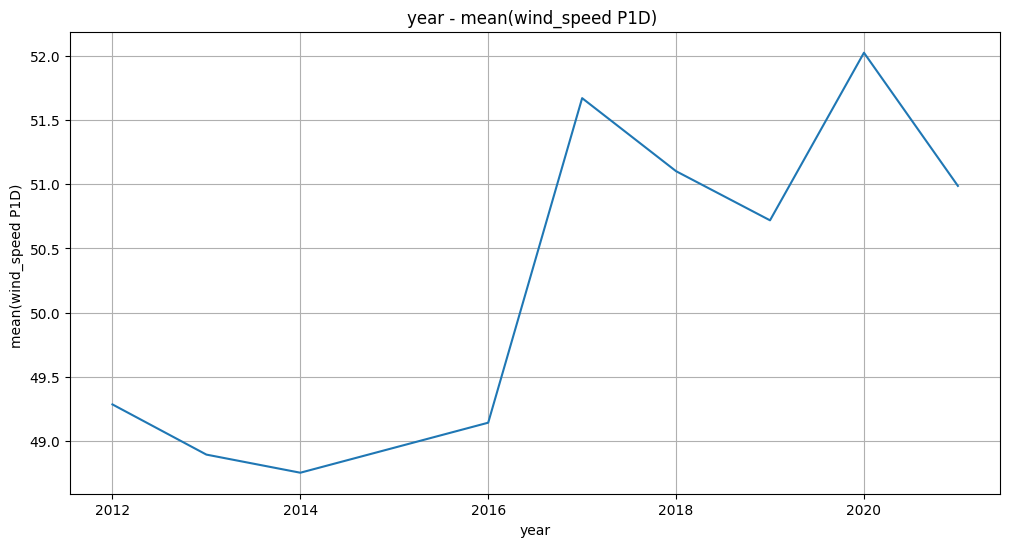

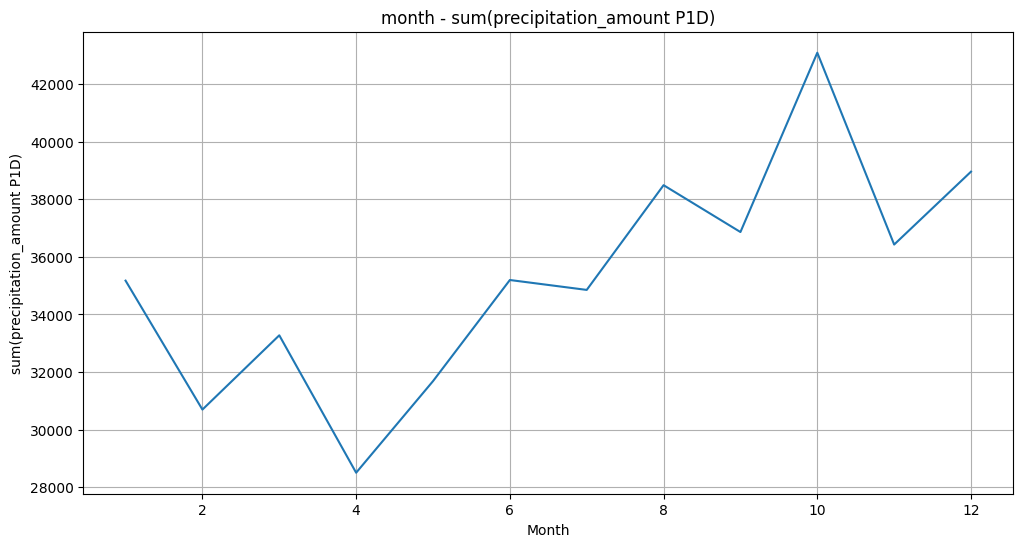

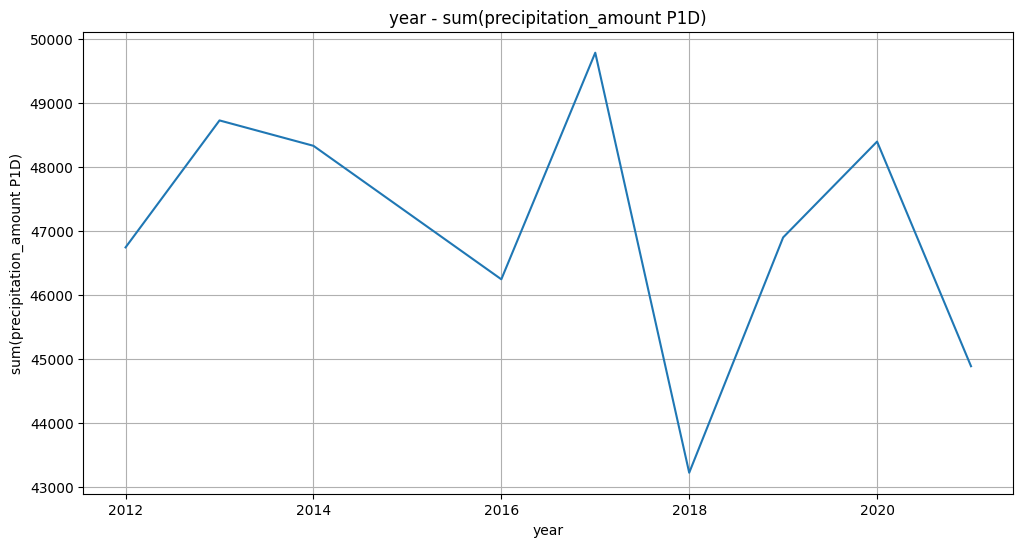

In [73]:
# Analysis of total monthly electricity generation
monthly_generation = df_Norway_IEA.groupby('month')['value'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation.plot(kind='line')

plt.title('Month - Value')
plt.xlabel('Month')
plt.ylabel('Value')
plt.grid(True)
plt.show()

############################################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation = df_Norway_IEA.groupby('year')['value'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation.plot(kind='line')

plt.title('year - Value')
plt.xlabel('year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

############################################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation2 = df_Norway_IEA.groupby('month')['max(air_temperature P1D)'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('Month - max(air_temperature P1D)')
plt.xlabel('Month')
plt.ylabel('max(air_temperature P1D)')
plt.grid(True)
plt.show()

############################################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation2 = df_Norway_IEA.groupby('year')['max(air_temperature P1D)'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('year - max(air_temperature P1D)')
plt.xlabel('year')
plt.ylabel('max(air_temperature P1D)')
plt.grid(True)
plt.show()

######################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation2 = df_Norway_IEA.groupby('month')['max(relative_humidity P1D)'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('month - max(relative_humidity P1D)')
plt.xlabel('Month')
plt.ylabel('max(relative_humidity P1D)')
plt.grid(True)
plt.show()

######################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation2 = df_Norway_IEA.groupby('year')['max(relative_humidity P1D)'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('year - max(relative_humidity P1D)')
plt.xlabel('year')
plt.ylabel('max(relative_humidity P1D)')
plt.grid(True)
plt.show()

########################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation2 = df_Norway_IEA.groupby('month')['max(wind_speed P1D)'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('month - max(wind_speed P1D)')
plt.xlabel('Month')
plt.ylabel('max(wind_speed P1D)')
plt.grid(True)
plt.show()

########################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation2 = df_Norway_IEA.groupby('year')['max(wind_speed P1D)'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('year - max(wind_speed P1D)')
plt.xlabel('year')
plt.ylabel('max(wind_speed P1D)')
plt.grid(True)
plt.show()

########################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation2 = df_Norway_IEA.groupby('month')['mean(air_temperature P1D)'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('month - mean(air_temperature P1D)')
plt.xlabel('Month')
plt.ylabel('mean(air_temperature P1D)')
plt.grid(True)
plt.show()

########################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation2 = df_Norway_IEA.groupby('year')['mean(air_temperature P1D)'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('year - mean(air_temperature P1D)')
plt.xlabel('year')
plt.ylabel('mean(air_temperature P1D)')
plt.grid(True)
plt.show()

########################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation2 = df_Norway_IEA.groupby('month')['mean(relative_humidity P1D)'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('month - mean(relative_humidity P1D)')
plt.xlabel('Month')
plt.ylabel('mean(relative_humidity P1D)')
plt.grid(True)
plt.show()

########################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation2 = df_Norway_IEA.groupby('year')['mean(relative_humidity P1D)'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('year - mean(relative_humidity P1D)')
plt.xlabel('year')
plt.ylabel('mean(relative_humidity P1D)')
plt.grid(True)
plt.show()

########################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation2 = df_Norway_IEA.groupby('month')['mean(wind_speed P1D)'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('month - mean(wind_speed P1D) ')
plt.xlabel('Month')
plt.ylabel('mean(wind_speed P1D) ')
plt.grid(True)
plt.show()

########################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation2 = df_Norway_IEA.groupby('year')['mean(wind_speed P1D)'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('year - mean(wind_speed P1D) ')
plt.xlabel('year')
plt.ylabel('mean(wind_speed P1D) ')
plt.grid(True)
plt.show()

########################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation2 = df_Norway_IEA.groupby('month')['sum(precipitation_amount P1D)'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('month - sum(precipitation_amount P1D)')
plt.xlabel('Month')
plt.ylabel('sum(precipitation_amount P1D)')
plt.grid(True)
plt.show()

########################################################################################################################

# Analysis of total monthly electricity generation
monthly_generation2 = df_Norway_IEA.groupby('year')['sum(precipitation_amount P1D)'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_generation2.plot(kind='line')

plt.title('year - sum(precipitation_amount P1D)')
plt.xlabel('year')
plt.ylabel('sum(precipitation_amount P1D)')
plt.grid(True)
plt.show()

# Training an RNN for Regression
## Example of what can be done with this dataset

1. **Data Preprocessing:**
   - Remove rows with missing values in the target column.
   - Split the dataset into features (X) and target (y).
   - Normalize features using MinMaxScaler.

2. **Train-Test Split:**
   - Split the dataset into training and testing sets.

3. **Reshape Features for RNN:**
   - Reshape features to fit the RNN input format.

4. **Build RNN Model:**
   - Create a Sequential model with a SimpleRNN layer (50 neurons, ReLU activation).
   - Add a Dense layer with linear activation for regression.

5. **Compile the Model:**
   - Compile the model using 'adam' optimizer and 'mean_squared_error' loss.

6. **Train the Model:**
   - Fit the model to the training data with 32 epochs and batch size of 32.
   - Validate the model on the test set.

7. **Make Predictions:**
   - Use the trained model to make predictions on the test set.

8. **Evaluate Performance:**
   - Calculate Mean Squared Error (MSE) between predicted and actual values.

9. **Print Training History:**
   - Print training and validation loss and accuracy over epochs.


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error

# Rimuovere le righe con valori mancanti nella colonna target
dfNor_Complete = dfNor_Complete.dropna(subset=['max(air_temperature P1D)'])

# Suddividere il dataset in features (X) e target (y)
X = dfNor_Complete.drop('max(air_temperature P1D)', axis=1)
y = dfNor_Complete['max(air_temperature P1D)']

# Normalizzare le features (scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Suddividere il dataset in training e testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape delle features per adattarle al formato richiesto dalla RNN
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Creare il modello RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(Dense(1, activation='linear'))

# Compilare il modello
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Addestrare il modello
history = model.fit(X_train, y_train, epochs=32, batch_size=32, validation_data=(X_test, y_test))

# Effettuare le previsioni sul test set
y_pred = model.predict(X_test)

# Calcolare l'errore medio quadratico
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Stampare le loss e accuracy durante l'addestramento
print("Training Loss:", history.history['loss'])
print("Validation Loss:", history.history['val_loss'])
print("Training Accuracy:", history.history['accuracy'])
print("Validation Accuracy:", history.history['val_accuracy'])

Epoch 1/32
5941/5941 [==============================] - 18s 3ms/step - loss: 8.8118 - accuracy: 4.6817e-04 - val_loss: 5.5379 - val_accuracy: 7.7852e-04
Epoch 2/32
5941/5941 [==============================] - 17s 3ms/step - loss: 5.3729 - accuracy: 4.9973e-04 - val_loss: 5.3097 - val_accuracy: 7.3644e-04
Epoch 3/32
5941/5941 [==============================] - 17s 3ms/step - loss: 5.2048 - accuracy: 5.3655e-04 - val_loss: 5.1752 - val_accuracy: 7.3644e-04
Epoch 4/32
5941/5941 [==============================] - 17s 3ms/step - loss: 5.1397 - accuracy: 5.4707e-04 - val_loss: 5.1493 - val_accuracy: 8.4164e-04
Epoch 5/32
5941/5941 [==============================] - 17s 3ms/step - loss: 5.0963 - accuracy: 5.4181e-04 - val_loss: 5.0752 - val_accuracy: 8.6269e-04
Epoch 6/32
5941/5941 [==============================] - 17s 3ms/step - loss: 5.0632 - accuracy: 5.9441e-04 - val_loss: 5.0406 - val_accuracy: 8.2060e-04
Epoch 7/32
5941/5941 [==============================] - 17s 3ms/step - loss: 5.026

# Climate Insights Dataset

## The following dataset represents a crucial resource for gaining significant insights into ongoing developments in our climate. Its extensive range of data includes detailed temperature records, information on CO2 emissions, and measurements of sea level rise. Focusing on global trends, this dataset provides scholars, scientists, and climate enthusiasts with the opportunity to conduct in-depth analyses to better understand the impact of climate change on our planet.

## **Disadvantages**: It is a dataset obtained from Kaggle, and therefore, it does not originate from official sources, as it lacks information on how the data were collected.

## Link:  https://www.kaggle.com/datasets/goyaladi/climate-insights-dataset/data

In [75]:
dfClimateInsights = pd.read_csv('/kaggle/input/climate-insights-dataset/climate_change_data.csv')
print(dfClimateInsights)

                               Date           Location                Country  \
0     2000-01-01 00:00:00.000000000    New Williamtown                 Latvia   
1     2000-01-01 20:09:43.258325832       North Rachel           South Africa   
2     2000-01-02 16:19:26.516651665   West Williamland          French Guiana   
3     2000-01-03 12:29:09.774977497        South David                Vietnam   
4     2000-01-04 08:38:53.033303330     New Scottburgh                Moldova   
...                             ...                ...                    ...   
9995  2022-12-27 15:21:06.966696576   South Elaineberg                 Bhutan   
9996  2022-12-28 11:30:50.225022464       Leblancville                  Congo   
9997  2022-12-29 07:40:33.483348224     West Stephanie              Argentina   
9998  2022-12-30 03:50:16.741674112        Port Steven                Albania   
9999  2022-12-31 00:00:00.000000000  West Anthonyburgh  Sao Tome and Principe   

      Temperature  CO2 Emis

In [76]:
# Display all locations
all_locations = dfClimateInsights['Country'].unique()

# # Print all locations
# for location in all_locations:
#     print(location)
    
# List of European countries
european_countries = [
    'Latvia', 'Moldova', 'Saint Helena', 'Tuvalu', 'Australia', 'Spain', 'Italy', 'Andorra', 'Gibraltar',
    'Monaco', 'Comoros', 'Bosnia and Herzegovina', 'Reunion', 'France', 'Czech Republic', 'Iceland',
    'Norfolk Island', 'Guernsey', 'Slovenia', 'Denmark', 'Czech Republic', 'Ireland', 'United Kingdom',
    'Netherlands', 'Bulgaria', 'Finland', 'Bhutan', 'Montenegro', 'Sweden', 'Romania', 'San Marino',
    'Holy See (Vatican City State)', 'Jersey', 'Norway', 'Slovakia (Slovak Republic)', 'North Macedonia',
    'Lithuania', 'Estonia', 'Russia', 'Serbia', 'Albania', 'France', 'Faroe Islands', 'Moldova', 'Armenia',
    'Austria', 'Malta', 'Germany', 'Switzerland', 'Luxembourg', 'Portugal', 'Belgium', 'Netherlands',
    'Ireland', 'Liechtenstein', 'Poland', 'Luxembourg', 'Switzerland', 'Belarus', 'Belgium', 'Cyprus',
    'Isle of Man', 'United Kingdom', 'Portugal', 'Macao', 'Turkey', 'Spain', 'France', 'Poland',
    'Luxembourg', 'Switzerland', 'Portugal', 'Malta', 'Austria', 'Germany', 'Turkey'
]

# Filter European countries from the provided list
european_locations = [country for country in european_countries if country in all_locations]

# Print European countries
print("European countries:")
for country in european_locations:
    print(country)

European countries:
Latvia
Moldova
Saint Helena
Tuvalu
Australia
Spain
Italy
Andorra
Gibraltar
Monaco
Comoros
Bosnia and Herzegovina
Reunion
France
Czech Republic
Iceland
Norfolk Island
Guernsey
Slovenia
Denmark
Czech Republic
Ireland
United Kingdom
Netherlands
Bulgaria
Finland
Bhutan
Montenegro
Sweden
Romania
San Marino
Holy See (Vatican City State)
Jersey
Norway
Slovakia (Slovak Republic)
North Macedonia
Lithuania
Estonia
Serbia
Albania
France
Faroe Islands
Moldova
Armenia
Austria
Malta
Germany
Switzerland
Luxembourg
Portugal
Belgium
Netherlands
Ireland
Liechtenstein
Poland
Luxembourg
Switzerland
Belarus
Belgium
Cyprus
Isle of Man
United Kingdom
Portugal
Macao
Turkey
Spain
France
Poland
Luxembourg
Switzerland
Portugal
Malta
Austria
Germany
Turkey


In [77]:
# Filter the DataFrame only for European countries
dfClimateInsights = dfClimateInsights[dfClimateInsights['Country'].isin(european_locations)]
dfClimateInsights.reset_index(drop=True, inplace=True)
print(dfClimateInsights)

                               Date          Location       Country  \
0     2000-01-01 00:00:00.000000000   New Williamtown        Latvia   
1     2000-01-04 08:38:53.033303330    New Scottburgh       Moldova   
2     2000-01-05 04:48:36.291629162      South Nathan  Saint Helena   
3     2000-01-06 00:58:19.549954995  Port Richardfurt        Tuvalu   
4     2000-01-06 21:08:02.808280828          Adambury     Australia   
...                             ...               ...           ...   
2263  2022-12-15 00:55:18.091809152  North Edwardbury   Netherlands   
2264  2022-12-22 14:22:47.416741632        New Ashley        Norway   
2265  2022-12-24 06:42:13.933393280        Stevenside       Reunion   
2266  2022-12-27 15:21:06.966696576  South Elaineberg        Bhutan   
2267  2022-12-30 03:50:16.741674112       Port Steven       Albania   

      Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0       10.688986     403.118903        0.717506      13.835237  23.6

In [78]:
# Check if there are null values in each column
null_values_per_column = dfClimateInsights.isnull().any()

# Print the result
print(null_values_per_column)

Date              False
Location          False
Country           False
Temperature       False
CO2 Emissions     False
Sea Level Rise    False
Precipitation     False
Humidity          False
Wind Speed        False
dtype: bool


In [79]:
# Convert the 'Date' column to datetime format
dfClimateInsights['Date'] = pd.to_datetime(dfClimateInsights['Date'])

# Create new columns 'Month', 'Year', and 'Country'
dfClimateInsights['Month'] = dfClimateInsights['Date'].dt.month
dfClimateInsights['Year'] = dfClimateInsights['Date'].dt.year

# Group by year, month, and country, and calculate aggregate statistics
dfClimateInsights = dfClimateInsights.groupby(['Year', 'Month', 'Country']).agg({
    'Temperature': 'mean',
    'CO2 Emissions': 'sum',
    'Sea Level Rise': 'mean',
    'Precipitation': 'sum',
    'Humidity': 'mean',
    'Wind Speed': 'mean'
}).reset_index()

# Print the resulting DataFrame information
print(dfClimateInsights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            2115 non-null   int32  
 1   Month           2115 non-null   int32  
 2   Country         2115 non-null   object 
 3   Temperature     2115 non-null   float64
 4   CO2 Emissions   2115 non-null   float64
 5   Sea Level Rise  2115 non-null   float64
 6   Precipitation   2115 non-null   float64
 7   Humidity        2115 non-null   float64
 8   Wind Speed      2115 non-null   float64
dtypes: float64(6), int32(2), object(1)
memory usage: 132.3+ KB
None


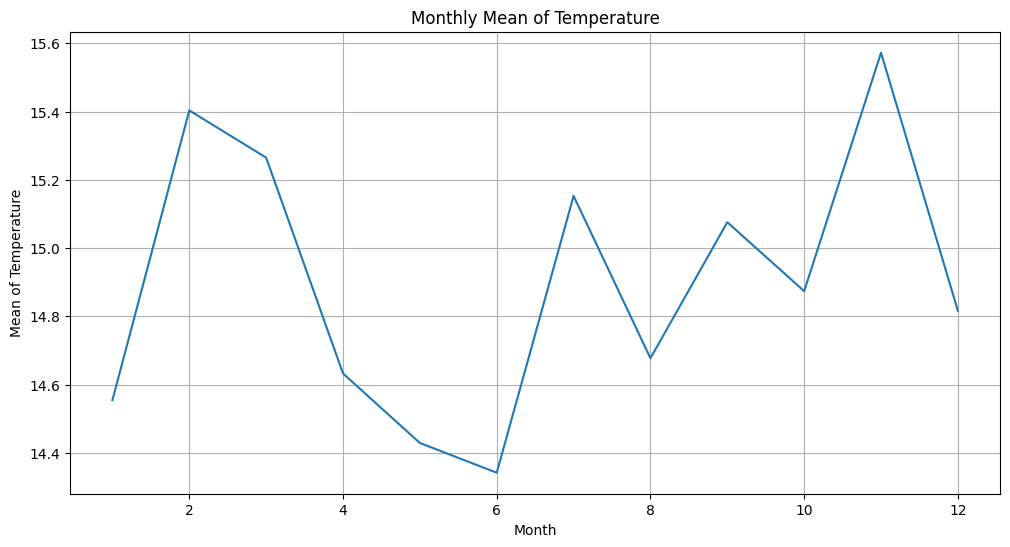

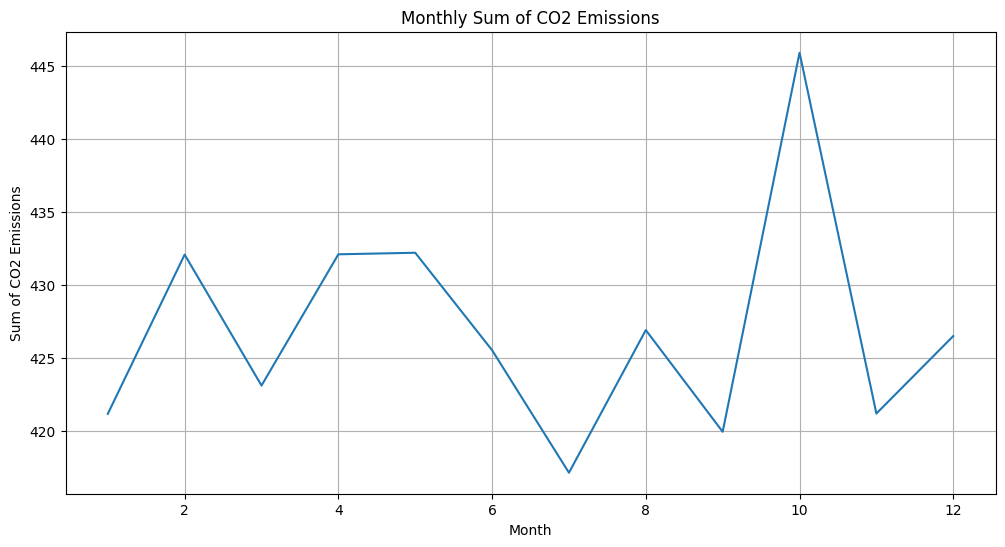

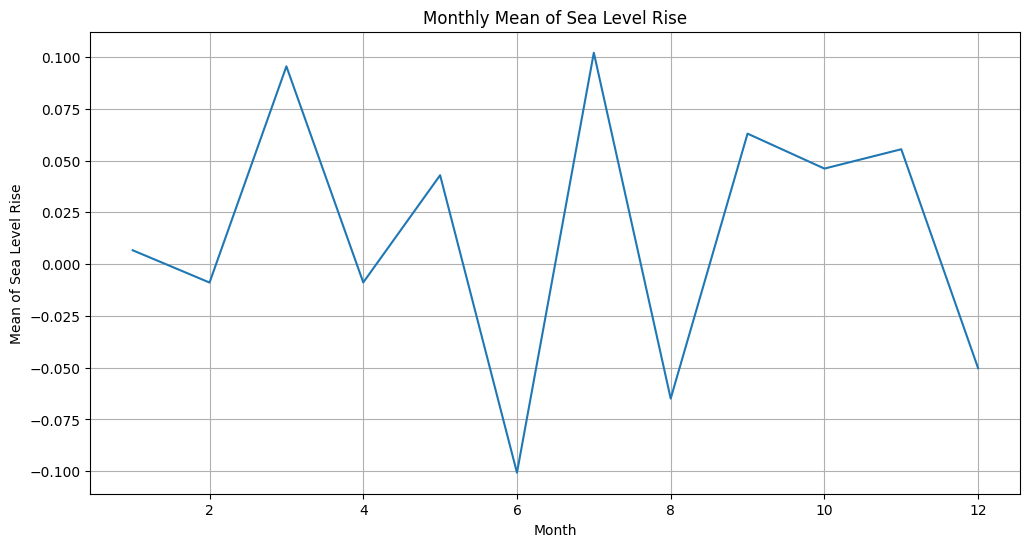

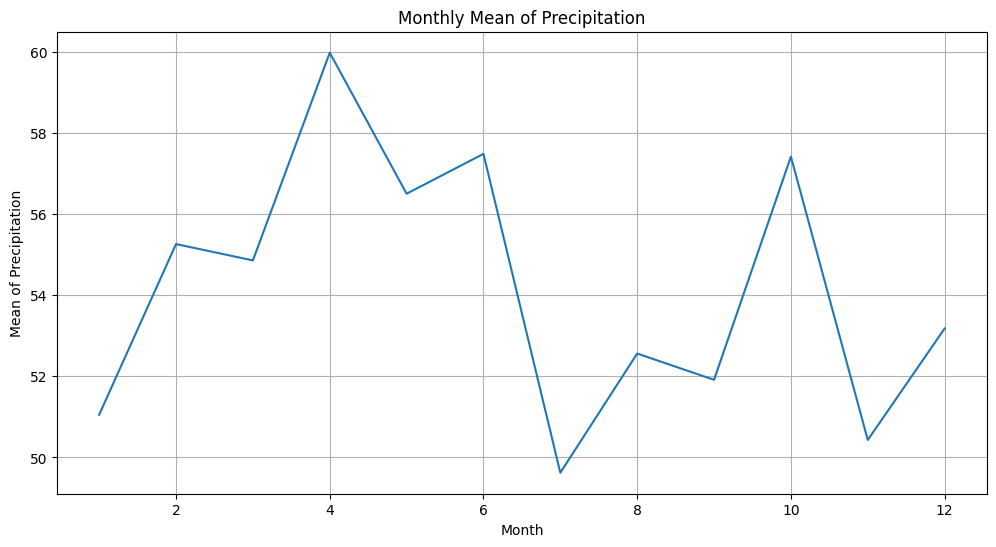

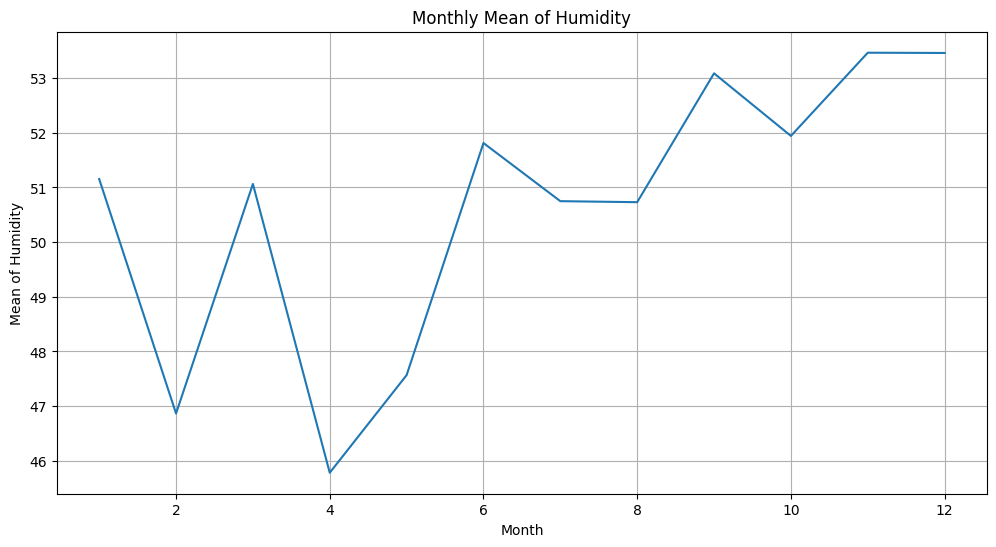

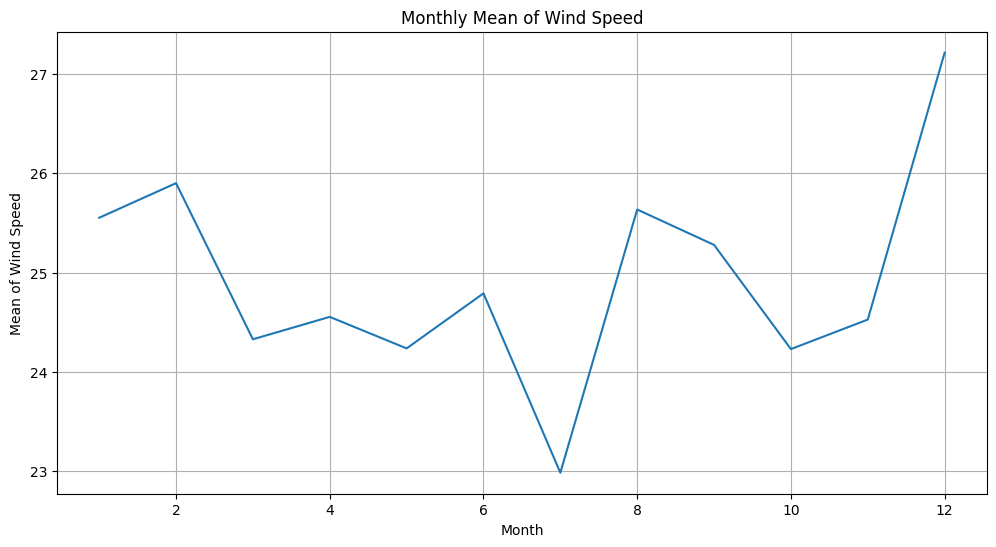

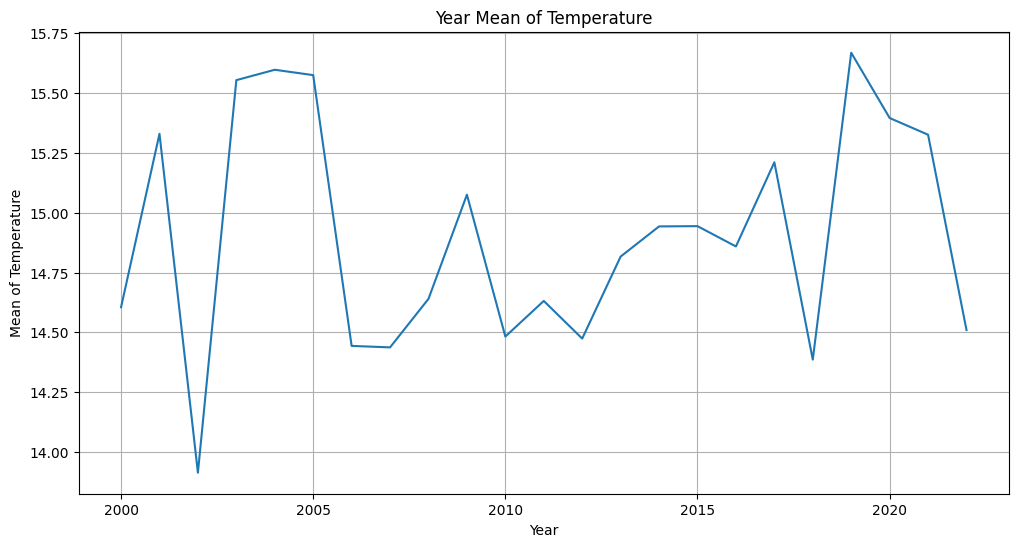

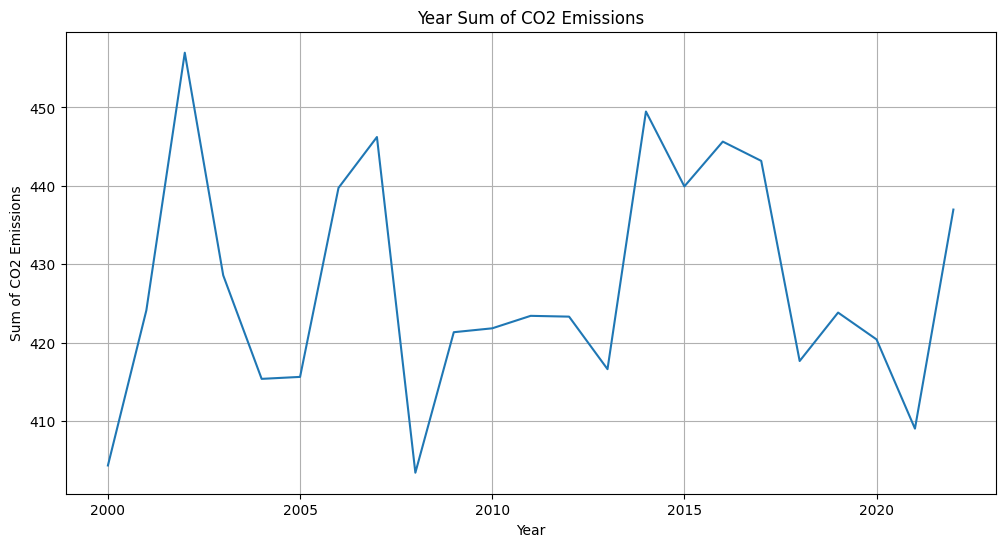

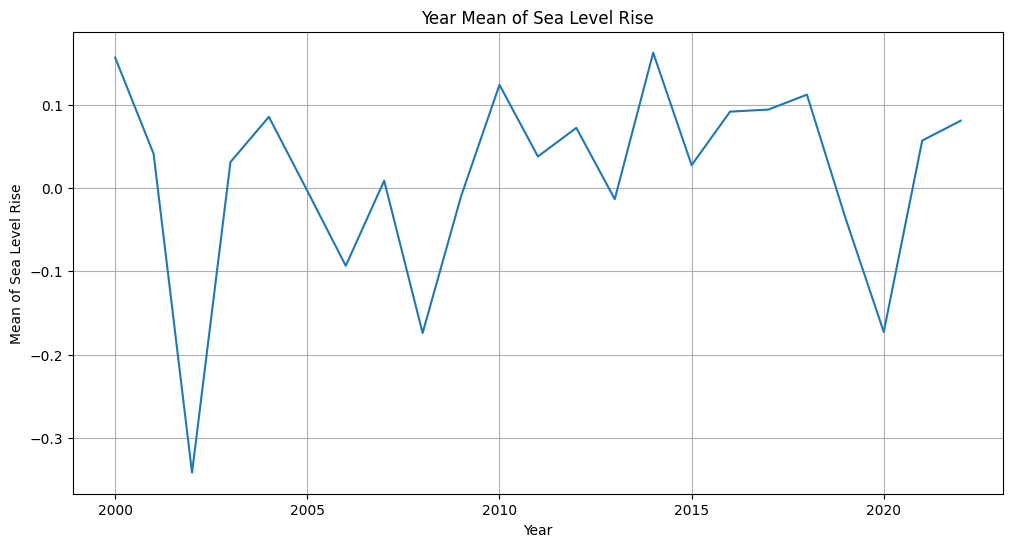

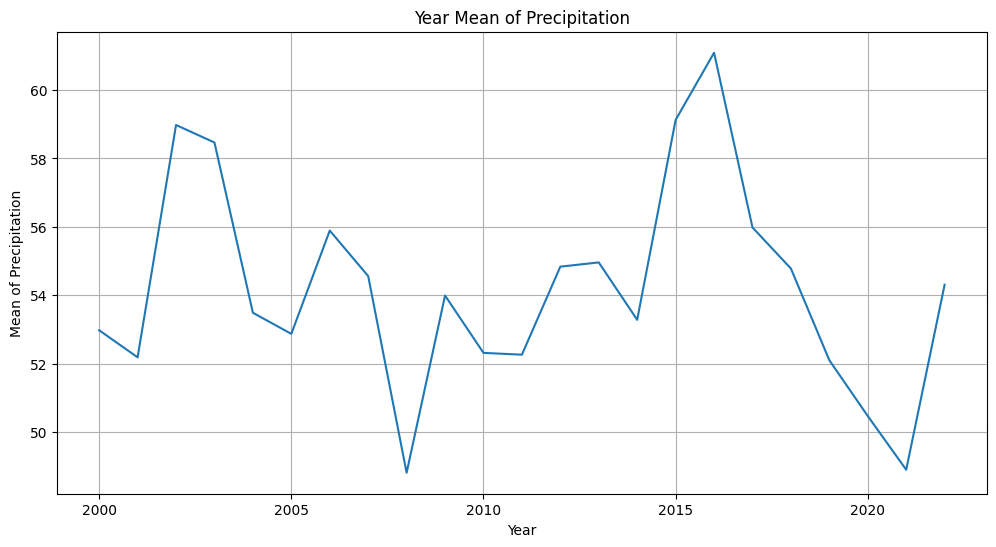

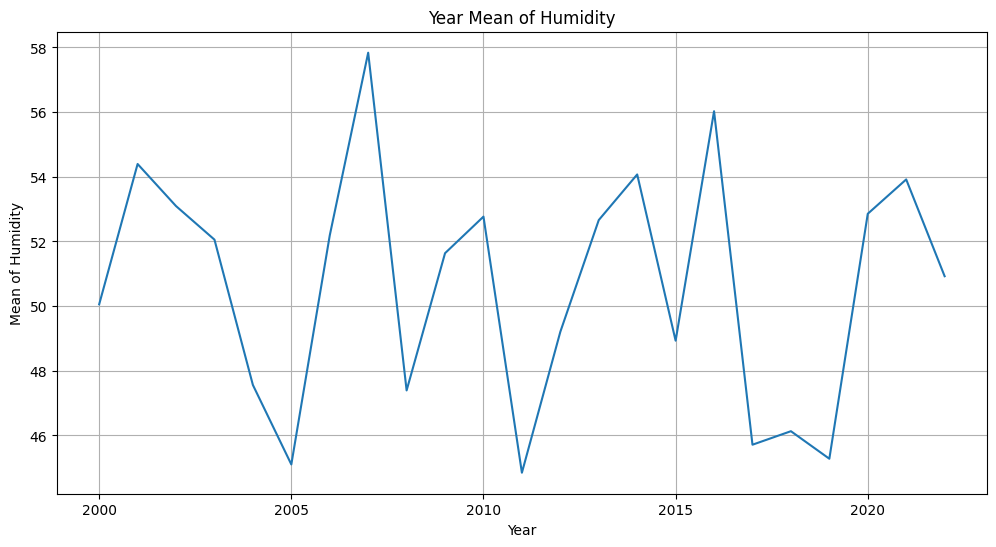

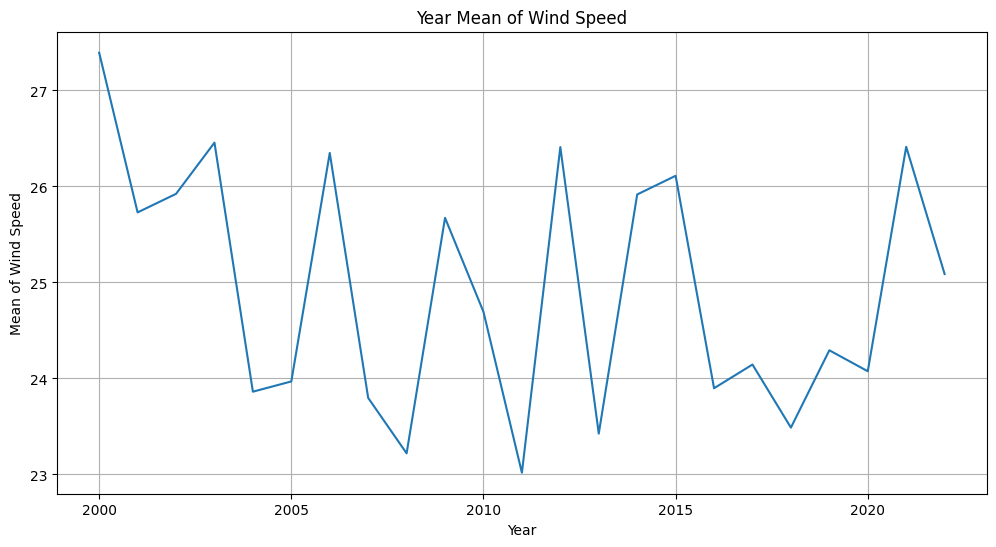

In [80]:
def generate_line_plot_month_mean(df, column_name, y_label):
    df_feature = df.groupby('Month')[column_name].mean()

    # Plot
    plt.figure(figsize=(12, 6))
    df_feature.plot(kind='line')

    plt.title(f'Monthly Mean of {column_name}')
    plt.xlabel('Month')
    plt.ylabel(f'Mean of {y_label}')
    plt.grid(True)
    plt.show()

def generate_line_plot_month_sum(df, column_name, y_label):
    df_feature = df.groupby('Month')[column_name].mean()

    # Plot
    plt.figure(figsize=(12, 6))
    df_feature.plot(kind='line')

    plt.title(f'Monthly Sum of {column_name}')
    plt.xlabel('Month')
    plt.ylabel(f'Sum of {y_label}')
    plt.grid(True)
    plt.show()
    
def generate_line_plot_year_mean(df, column_name, y_label):
    df_feature = df.groupby('Year')[column_name].mean()

    # Plot
    plt.figure(figsize=(12, 6))
    df_feature.plot(kind='line')

    plt.title(f'Year Mean of {column_name}')
    plt.xlabel('Year')
    plt.ylabel(f'Mean of {y_label}')
    plt.grid(True)
    plt.show()
    
def generate_line_plot_year_sum(df, column_name, y_label):
    df_feature = df.groupby('Year')[column_name].mean()

    # Plot
    plt.figure(figsize=(12, 6))
    df_feature.plot(kind='line')

    plt.title(f'Year Sum of {column_name}')
    plt.xlabel('Year')
    plt.ylabel(f'Sum of {y_label}')
    plt.grid(True)
    plt.show()

# Make the graphs
generate_line_plot_month_mean(dfClimateInsights, 'Temperature', 'Temperature')
generate_line_plot_month_sum(dfClimateInsights, 'CO2 Emissions', 'CO2 Emissions')
generate_line_plot_month_mean(dfClimateInsights, 'Sea Level Rise', 'Sea Level Rise')
generate_line_plot_month_mean(dfClimateInsights, 'Precipitation', 'Precipitation')
generate_line_plot_month_mean(dfClimateInsights, 'Humidity', 'Humidity')
generate_line_plot_month_mean(dfClimateInsights, 'Wind Speed', 'Wind Speed')


generate_line_plot_year_mean(dfClimateInsights, 'Temperature', 'Temperature')
generate_line_plot_year_sum(dfClimateInsights, 'CO2 Emissions', 'CO2 Emissions')
generate_line_plot_year_mean(dfClimateInsights, 'Sea Level Rise', 'Sea Level Rise')
generate_line_plot_year_mean(dfClimateInsights, 'Precipitation', 'Precipitation')
generate_line_plot_year_mean(dfClimateInsights, 'Humidity', 'Humidity')
generate_line_plot_year_mean(dfClimateInsights, 'Wind Speed', 'Wind Speed')


# What emerges from these graphs?
Upon a thorough examination of the graphs depicting global temperatures, an intriguing picture unfolds. Given the global nature of the data, it is unsurprising not to find uniform Gaussian distribution curves. However, it is evident that the highest temperatures predominantly occur during the summer months, with significant peaks recorded in July and August.

What deserves particular attention is the occurrence of elevated temperatures in seemingly 'unexpected' months. This phenomenon could be attributed to various factors, such as climatic anomalies or specific meteorological events. Observing high temperatures in periods other than those typically associated with summer suggests the influence of complex environmental factors.

In conclusion, the analysis of the graphs highlights the variety and complexity of global climate trends, underscoring the importance of considering multiple factors in understanding temperature variations on a global scale

# -------------------------------------------------------------------------------------------------------------------------------------

## The next dataset is provided by the Euro-Mediterranean Center on Climate Change, so it does not come from Kaggle. However, after downloading it, I encounter difficulties in using it because it is a very large .nc file. Kaggle does not allow the conversion of the file due to its size and memory usage. When I try to perform the operation on my computer, a malfunction occurs as the system freezes after a short period.

In [81]:
# import xarray as xr

# # Use double backslashes for the file path
# file_path = "/kaggle/input/temperature-blacksea-nc/temperature_blacksea-analysis_daily-analysis_t_343475.nc"

# # Load the NetCDF file using xarray
# ds = xr.open_dataset(file_path)

# # Convert the xarray dataset to a Pandas DataFrame
# last_df = ds.to_dataframe()


In [82]:
# print(last_df.info())
# print("\n\n\n")

# ---------------------------------------------------------------------------------------------------------------------------------------------




## Finding datasets containing meteorological data can prove to be a challenge, but even from the small datasets I have studied and created, it is clear that those analyzed so far are reliable and consistent. This is reflected in the coherence and correspondence of values, as well as in the similar distribution of energy production in each dataset.

## Despite the validity of the datasets I have worked with, the current challenge lies in the difficulty of finding additional national or international datasets. The scarcity of such datasets represents a limitation for further exploration and analysis. However, the insights gained from the available datasets underscore the importance of robust and comprehensive meteorological data for a thorough understanding of energy production patterns.